In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install six
!pip install numpy
!pip install slimit
!pip install psutil
!pip install fastBPE
!pip install javalang
!pip install submitit
!pip install dpu-utils
!pip install astunparse
!pip install stringcase
!pip install scikit-learn
!pip install torch
!pip install transformers
!pip install fairseq
!pip install tree_sitter
!pip install tensorboard
!pip install sentencepiece
!pip install tensorboardX
!pip install sacrebleu
!pip install simpletransformers
!pip install torchmetrics
!pip install --upgrade gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.1 MB/s eta 0:00:00
  Created wheel for slimit: filename=slimit-0.8.1-py3-none-any.whl size=79435 sha256=a849a330abafabd1b9375034d3b09a1b55bfc8c936c37be496bbb32166c84d0f
  Stored in directory: /root/.cache/pip/wheels/67/b4/c2/ebe388930097eb1456e91778daa41da8c461f88ce024db7aec
Successfully built slimit
  Preparing metadata (setup.py) ... done
  Created wheel for fastBPE: filename=fastBPE-0.1.0-cp310-cp310-linux_x86_64.whl size=775292 sha256=7e7777f6a1e5600f0c28343e5ea5516f959026df7ded244efedf6d80d2b56a2f
  Stored in directory: /root/.cache/pip/wheels/13/5d/b9/4b8897941ebc9e8c6cc3f3ffd3ea5115731754269205098754
Successfully built fastBPE
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [ ]:
# general
import os
import json
import random
import warnings
from typing import List,Tuple

# ML
import numpy as np
import scipy as sp
import pandas as pd

# visual
import matplotlib
import seaborn as sns
from tqdm import tqdm
from tabulate import tabulate
import matplotlib.pyplot as plt
from IPython.display import display

# DL
import torch
import torch.nn as nn

# HF
from transformers import BertTokenizer
from transformers import BertForSequenceClassification
from torchmetrics.text import BLEUScore, MatchErrorRate, CharErrorRate, TranslationEditRate, SacreBLEUScore
from torchmetrics.text.rouge import ROUGEScore
from torchmetrics import MetricCollection



import gzip
import json
import logging
import os
from pathlib import Path
from typing import Dict, List, Tuple

import numpy as np
import torch
from sklearn.metrics import f1_score
from tokenizers.implementations.byte_level_bpe import ByteLevelBPETokenizer
from tokenizers.processors import BertProcessing
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.dataset import Dataset
from torch.utils.tensorboard.writer import SummaryWriter
from tqdm import tqdm, trange

from transformers import RobertaForSequenceClassification, RobertaTokenizer
from transformers.data.metrics import acc_and_f1, simple_accuracy

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# XLCoST

In [ ]:
# !gdown "14SEj8Q1oQaogQsaBn-9iTlMN334mW3d1&confirm=t"

In [ ]:
!gdown "1tZfsYQgWmc2gG340ru5VbrZ5aLIZ41_6&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1tZfsYQgWmc2gG340ru5VbrZ5aLIZ41_6&confirm=t
To: /content/XLCoST_data.zip
100% 298M/298M [00:01<00:00, 221MB/s]


In [ ]:
!unzip "/content/XLCoST_data.zip"

Archive:  /content/XLCoST_data.zip
   creating: XLCoST_data/
  inflating: __MACOSX/._XLCoST_data  
   creating: XLCoST_data/retrieval/
  inflating: __MACOSX/XLCoST_data/._retrieval  
   creating: XLCoST_data/generation/
  inflating: __MACOSX/XLCoST_data/._generation  
   creating: XLCoST_data/retrieval/nl2code_search/
  inflating: __MACOSX/XLCoST_data/retrieval/._nl2code_search  
   creating: XLCoST_data/retrieval/code2code_search/
  inflating: __MACOSX/XLCoST_data/retrieval/._code2code_search  
   creating: XLCoST_data/retrieval/.ipynb_checkpoints/
  inflating: __MACOSX/XLCoST_data/retrieval/._.ipynb_checkpoints  
   creating: XLCoST_data/generation/pair_data_tok_full_desc_comment/
  inflating: __MACOSX/XLCoST_data/generation/._pair_data_tok_full_desc_comment  
   creating: XLCoST_data/generation/pair_data_tok_1_comment/
  inflating: __MACOSX/XLCoST_data/generation/._pair_data_tok_1_comment  
   creating: XLCoST_data/generation/pair_data_tok_full_desc/
  inflating: __MACOSX/XLCoST_dat

In [ ]:
!gdown "1a_JpJmlaaI7opFYpThZ45aiDtXcUET6A&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1a_JpJmlaaI7opFYpThZ45aiDtXcUET6A&confirm=t
To: /content/train-match-pairs-data-P-J-C#-C-JS.json
100% 151M/151M [00:00<00:00, 263MB/s]


In [ ]:
!gdown "1F3t1jx7oodsJgO0z9CWagUCc4-rZOMR2&confirm=t"

In [ ]:
!gdown "1_kjMMHSCRBFdmRJryKFmPTnCu9r4NaPa&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1_kjMMHSCRBFdmRJryKFmPTnCu9r4NaPa&confirm=t
To: /content/val-homogeneous-file-pairs-data-P-J-C#-C-JS.json
100% 8.25M/8.25M [00:00<00:00, 163MB/s]


In [ ]:
!gdown "1uQo7tYkazrYSv16pfDvnrp2-5sOavLwV&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1uQo7tYkazrYSv16pfDvnrp2-5sOavLwV&confirm=t
To: /content/train-homogeneous-file-pairs-data-P-J-C#-C-JS.json
100% 151M/151M [00:00<00:00, 226MB/s]


In [ ]:
!gdown "1L1WUBl6m-ce8xQBHTjutbIleDk3DtpE-&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1L1WUBl6m-ce8xQBHTjutbIleDk3DtpE-&confirm=t
To: /content/DeepSCC-RoBERTa-model-full-mixed-lang-snips.pt
100% 500M/500M [00:03<00:00, 158MB/s]


In [ ]:
!gdown "1d_dUfziicRoSQVR9sSv7YYyytL2keJol&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1d_dUfziicRoSQVR9sSv7YYyytL2keJol&confirm=t
To: /content/python_classifier_model_end_train.pt
100% 334M/334M [00:14<00:00, 23.5MB/s]


In [ ]:
!gdown "1aqybKA-_hT8iZWq1N2YQWWbMrfzgZEEM&confirm=t"

In [ ]:
!gdown "1XTz9dMBZFtWOlryqORfO69DCA0nwEmEA&confirm=t"

# Shared code

## Datasets classes

In [ ]:
import torch
from torch.utils.data import Dataset
from collections import defaultdict

class CodeSnipPairsDataset(Dataset):
    def __init__(self, snip_pairs):
      self.snip_pairs = snip_pairs

    def __len__(self):
        return len(self.snip_pairs)

    def __getitem__(self, idx):
        return self.snip_pairs[idx]

In [ ]:
import torch
from torch.utils.data import Dataset
from collections import defaultdict

class CodePairsDataset(Dataset):
    def __init__(self, java_exmp, python_exmp):
      self.java_samples = []
      self.python_samples = []
      self.samples_idx = []
      for k in java_exmp.keys():
        self.java_samples.append(' '.join(java_exmp[k]))
        self.python_samples.append(' '.join(python_exmp[k]))
        self.samples_idx.append(k)

    def __len__(self):
        return len(self.samples_idx)

    def __getitem__(self, idx):
        java_code = self.java_samples[idx]
        python_code = self.python_samples[idx]
        exmp_id = self.samples_idx[idx]
        return exmp_id, java_code, python_code

In [ ]:
import torch
from torch.utils.data import Dataset
from collections import defaultdict

class MatchCodePairsDataset(Dataset):
    def __init__(self, java_exmp, python_exmp):
      self.code_pairs = []
      rng = np.random.default_rng()
      for k in java_exmp.keys():
        match_pair = (java_exmp[k], python_exmp[k], 1)
        keys_to_sample = list(java_exmp.keys()).copy()
        keys_to_sample.remove(k)
        sample_key = rng.choice(keys_to_sample)
        mismatch_pair = (java_exmp[k], python_exmp[sample_key], 0)
        self.code_pairs.append(match_pair)
        self.code_pairs.append(mismatch_pair)

    def __len__(self):
      return len(self.code_pairs)

    def __getitem__(self, idx):
      java_code, python_code, label = self.code_pairs[idx]
      return java_code, python_code, label

In [ ]:
import torch
from torch.utils.data import Dataset
from collections import defaultdict

class MatchCodeSnipPairsDataset(Dataset):
    def __init__(self, snip_pairs, create=True):
        if create:
          self.snip_pairs = []
          rng = np.random.default_rng()
          pair_idxs = [ i for i in range(len(snip_pairs))]
          for idx, pair in enumerate(snip_pairs):
            match_pair = (pair[0], pair[1], 1)
            keys_to_sample = pair_idxs.copy()
            keys_to_sample.remove(idx)
            sample_key = rng.choice(keys_to_sample)
            mismatch_pair = (pair[0], snip_pairs[sample_key][1], 0)
            self.snip_pairs.append(match_pair)
            self.snip_pairs.append(mismatch_pair)
        else:
            self.snip_pairs = snip_pairs

    def __len__(self):
      return len(self.snip_pairs)

    def __getitem__(self, idx):
      java_code, python_code, label = self.snip_pairs[idx]
      return java_code, python_code, label

## Read data functions

In [ ]:
def read_examples(map_filename, code_filename):
    """Read examples from filename."""
    examples={}
    with open(map_filename) as f1,open(code_filename) as f2:
            for line1,line2 in zip(f1,f2):
              exp_id = int(line1.strip().split('-')[0])
              if exp_id in examples.keys():
                examples[exp_id].append(line2.strip())
              else:
                examples[exp_id] = [line2.strip()]
    return examples

In [ ]:
def read_snip_examples(src_filename, trg_filename):
    """Read examples from filename."""
    examples=[]
    with open(src_filename) as f1,open(trg_filename) as f2:
            for line1,line2 in zip(f1,f2):
              examples.append((line1.strip(), line2.strip()))
    return examples

In [ ]:
def read_match_pairs_json(file_path):
  with open(file_path, "r") as f:
    match_pairs = json.load(f)
    match_pairs = [(i['code1'], i['code2'], i['label']) for i in match_pairs]

    return match_pairs

## Models

In [ ]:
import numpy as np
import time
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast


class BERT_Arch(nn.Module):
    def __init__(self, bert):
        super(BERT_Arch, self).__init__()

        self.bert = bert

        # dropout layer
        self.dropout = nn.Dropout(0.2)

        # relu activation function
        self.relu = nn.ReLU()

        # dense layer 1
        self.fc1 = nn.Linear(768, 512)

        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512, 2)

        # softmax activation function
        self.softmax = nn.LogSoftmax(dim = 1)

    # define the forward pass
    def forward(self, input, mask):
        # pass the inputs to the model
        _, cls_hs = self.bert(input, attention_mask = mask, return_dict=False)

        x = self.fc1(cls_hs)

        x = self.relu(x)

        x = self.dropout(x)

        # output layer
        x = self.fc2(x)


        # apply softmax activation
        x = self.softmax(x)
        return x

# Translate code

In [ ]:
from transformers import TextClassificationPipeline

CODEBERTA_LANGUAGE_ID = "huggingface/CodeBERTa-language-id"

py_pipeline = TextClassificationPipeline(
    model=RobertaForSequenceClassification.from_pretrained(CODEBERTA_LANGUAGE_ID),
    tokenizer=RobertaTokenizer.from_pretrained(CODEBERTA_LANGUAGE_ID)
)

In [ ]:
import numpy as np
import torch
import pickle
import pandas as pd
import torch.nn as nn
from torch.nn import DataParallel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoTokenizer, AutoModelForMaskedLM, AutoModel, AutoTokenizer
from transformers import AdamW
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

model_pretained_name = "NTUYG/DeepSCC-RoBERTa"
pt_model = AutoModel.from_pretrained(model_pretained_name)

logic_tokenizer = AutoTokenizer.from_pretrained(model_pretained_name)

for param in pt_model.parameters():
    param.requires_grad = False

logic_model = BERT_Arch(pt_model)
logic_model.load_state_dict(torch.load("/content/DeepSCC-RoBERTa-model-full-mixed-lang-snips.pt", map_location=device))
logic_model = logic_model.to(device)
logic_model.eval()


BERT_Arch(
  (bert): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((7

In [ ]:
def convert_snips_to_logic_features(examples, tokenizer, max_source_length=128, max_target_length=128):
    tokens = []
    masks = []
    cls_token = None
    sep_token = None
    if tokenizer.cls_token and tokenizer.sep_token:
        cls_token = tokenizer.cls_token
        sep_token = tokenizer.sep_token
    else:
        cls_token = tokenizer.bos_token
        sep_token = tokenizer.eos_token
    for example in examples:
        java_code, python_code = example

        source_tokens = tokenizer.tokenize(java_code)[:max_source_length-2]
        source_tokens =[cls_token]+source_tokens+[sep_token]
        source_ids =  tokenizer.convert_tokens_to_ids(source_tokens)
        source_mask = [1] * len(source_ids)
        padding_length = max_source_length - len(source_ids)
        source_ids+=[tokenizer.pad_token_id]*padding_length
        source_mask+=[0]*padding_length

        target_tokens = tokenizer.tokenize(python_code)[:max_target_length-2]
        target_tokens = [cls_token]+target_tokens+[sep_token]
        target_ids = tokenizer.convert_tokens_to_ids(target_tokens)
        target_mask = [1] * len(target_ids)
        padding_length = max_target_length - len(target_ids)
        target_ids+=[tokenizer.pad_token_id]*padding_length
        target_mask+=[0]*padding_length

        src_trg_tokens = source_ids + target_ids
        src_trg_mask = source_mask + target_mask

        tokens.append(torch.tensor(src_trg_tokens))
        masks.append(torch.tensor(src_trg_mask))


    return tokens, masks

In [ ]:
def convert_examples_to_features(examples, tokenizer, max_source_length=128, max_target_length=128, stage=None):
    features = []
    cls_token = None
    sep_token = None
    if tokenizer.cls_token and tokenizer.sep_token:
        cls_token = tokenizer.cls_token
        sep_token = tokenizer.sep_token
    else:
        cls_token = tokenizer.bos_token
        sep_token = tokenizer.eos_token
    for example_index, example in enumerate(examples):
        #source
        source, target = example
        source_tokens = tokenizer.tokenize(source)[:max_source_length-2]
        source_tokens =[cls_token]+source_tokens+[sep_token]
        source_ids =  tokenizer.convert_tokens_to_ids(source_tokens)
        source_mask = [1] * (len(source_tokens))
        padding_length = max_source_length - len(source_ids)
        source_ids+=[tokenizer.pad_token_id]*padding_length
        source_mask+=[0]*padding_length

        #target
        if stage=="test":
            target_tokens = tokenizer.tokenize("None")
        else:
            target_tokens = tokenizer.tokenize(target)[:max_target_length-2]
        target_tokens = [cls_token]+target_tokens+[sep_token]
        target_ids = tokenizer.convert_tokens_to_ids(target_tokens)
        target_mask = [1] *len(target_ids)
        padding_length = max_target_length - len(target_ids)
        target_ids+=[tokenizer.pad_token_id]*padding_length
        target_mask+=[0]*padding_length


        features.append(
            (
                 example_index,
                 torch.tensor(source_ids, dtype=torch.long).to(device),
                 torch.tensor(target_ids, dtype=torch.long).to(device),
                 torch.tensor(source_mask, dtype=torch.long).to(device),
                 torch.tensor(target_mask, dtype=torch.long).to(device)
            )
        )
    return features

In [ ]:
import numpy as np
import time
import torch
from sklearn.metrics import accuracy_score
import os
from tqdm import tqdm

def train(epochs, examples, val_examples, trans_model, py_pipeline, logic_model, trans_tok, logic_tok, train_dataloader, cross_entropy, optimizer, val_dataloader, max_target_length, beam_size):
    train_losses = []
    valid_losses = []
    epoch_losses = {}
    # set initial loss to infinite
    best_valid_loss = float('inf')
    result_name = MODEL_FILE_PREFIX + ".txt"
    epoch_losses_file = MODEL_FILE_PREFIX + "-epoch_losses" + ".json"
    f = open(result_name, "w")
    f.close()
    # for each epoch
    for epoch in tqdm(range(epochs)):
        # train model
        train_loss, losses, preds = train_epoch(examples, trans_model, py_pipeline, logic_model, trans_tok, logic_tok, train_dataloader, cross_entropy, optimizer, max_target_length, beam_size)
        epoch_losses[str(epoch)] = losses

        with open(MODEL_FILE_PREFIX+"-ep-train-preds-"+str(epoch)+".json", "w") as f:
            json.dump(preds, f)
            del preds

        # evaluate model
        valid_loss, acc_score, preds = evaluate(val_examples, val_dataloader, trans_model, py_pipeline, logic_model, trans_tok, logic_tok, cross_entropy, max_target_length, beam_size)
        with open(MODEL_FILE_PREFIX+"-ep-eval-preds-"+str(epoch)+".json", "w") as f:
            json.dump(preds, f)
            del preds

        # save the best model
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            torch.save(trans_model.state_dict(), MODEL_FILE_PREFIX+".pt")

        # append training and validation loss
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)

#         print(f"Epoch: {epoch}, Loss: {train_loss}, Val accuracy: {acc_score}, Val loss: {valid_loss}")
        print(f'\nTraining Loss: {train_loss:.3f}')
        print(f'Validation Loss: {valid_loss:.3f}')
        print(f'Accuracy: {acc_score:.3f}')
        with open(result_name, "a") as f:
            f.writelines(f'{train_loss:.3f} {valid_loss:.3f} {acc_score:.3f}')
            f.writelines("\n")

        with open(epoch_losses_file, "w") as f:
            json.dump(epoch_losses, f)

    return train_losses, valid_losses


def train_epoch(examples, trans_model, py_pipeline, logic_model, trans_tok, logic_tok, train_dataloader, cross_entropy, optimizer, max_target_length, beam_size):
    trans_model.train()
    logic_model.eval()

    total_loss, total_accuracy = 0, 0
    losses = []
    total_preds = []

    # iterate over batches
    for step, batch in tqdm(enumerate(train_dataloader)):

        exmp_idxs,source_ids,target_ids,source_mask,target_mask = batch
        source_ids = source_ids.to(device)
        source_mask = source_mask.to(device)
        target_ids = target_ids.to(device)
        target_mask = target_mask.to(device)

        trans_model.zero_grad()
        optimizer.zero_grad()

        try:
            outputs = trans_model(input_ids=source_ids, attention_mask=source_mask,
                                  labels=target_ids, decoder_attention_mask=target_mask)
            trans_loss = outputs.loss
        except Exception as e:
            print(exmp_idxs)
            print(source_ids)
            print(target_ids)
            raise e

        preds = trans_model.generate(source_ids,
                                       attention_mask=source_mask,
                                       use_cache=True,
                                       num_beams=beam_size,
                                       early_stopping=False,
                                       max_length=max_target_length)
        pred_ids = list(preds.cpu().numpy())
        p = [trans_tok.decode(id, skip_special_tokens=True, clean_up_tokenization_spaces=False) for id in pred_ids]

        is_python_pred = torch.tensor([1 if is_py_prd['label'] == 'python' else 0 for is_py_prd in py_pipeline(p)]).to(device)
        fake_model_py_logits = torch.ones((is_python_pred.size()[0],2)).to(device)
        fake_model_py_logits[:,0] = 0
        py_loss = cross_entropy(fake_model_py_logits, is_python_pred)

        java_examp = [examples[i][0] for i in exmp_idxs]
        python_examp = [examples[i][1] for i in exmp_idxs]

        pairs = list(zip(java_examp,p))
        tok_pairs, pairs_masks = convert_snips_to_logic_features(pairs, logic_tok)
        tok_pairs = torch.stack(tok_pairs).to(device)
        pairs_masks = torch.stack(pairs_masks).to(device)

        logic_logits = logic_model(tok_pairs, pairs_masks)
        logic_preds = torch.argmax(logic_logits, dim=1)
        fake_model_logic_logits = torch.ones(logic_logits.size()).to(device)
        fake_model_logic_logits[:,0] = 0
        logic_loss = cross_entropy(fake_model_logic_logits, logic_preds)

        batch_loss = TRANS_LOSS_PRC*trans_loss + PY_LOSS_PRC*py_loss + LOGIC_LOSS_PRC*logic_loss
        curr_loss = batch_loss.item()

        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
            print(f"curr_loss: {curr_loss}")

        if step % 100 == 0 and not step == 0:
            total_preds.extend(zip(java_examp,python_examp,p))

        if step % 400 == 0 and not step == 0 and curr_loss < losses[-1]:
            print("Saving model...")
            torch.save(trans_model.state_dict(), MODEL_FILE_PREFIX+".pt")

        # backward pass to calculate the gradients
        batch_loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(trans_model.parameters(), 1.0)

        # update parameters
        optimizer.step()

        total_loss += curr_loss
        losses.append(curr_loss)

    # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)

    return avg_loss, losses,  [{'java':p[0], 'python_t':p[1], 'python_p':p[2]} for p in total_preds]



# function for evaluating the model
def evaluate(examples, val_dataloader, trans_model, py_pipeline, logic_model, trans_tok, logic_tok, cross_entropy, max_target_length, beam_size):
    print("\nEvaluating...")

    # deactivate dropout layers
    trans_model.eval()
    logic_model.eval()

    total_loss, total_accuracy = 0, 0
    acc_score = 0
    total_preds = []
    t0 = time.time()
    # iterate over batches
    for step, batch in enumerate(val_dataloader):

        # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = time.time() - t0

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

        exmp_idxs,source_ids,target_ids,source_mask,target_mask = batch
        source_ids = source_ids.to(device)
        source_mask = source_mask.to(device)
        target_ids = target_ids.to(device)
        target_mask = target_mask.to(device)


        # deactivate autograd
        with torch.no_grad():

            # model predictions
            outputs = trans_model(input_ids=source_ids, attention_mask=source_mask,
                                  labels=target_ids, decoder_attention_mask=target_mask)
            trans_loss = outputs.loss

            preds = trans_model.generate(source_ids,
                                           attention_mask=source_mask,
                                           use_cache=True,
                                           num_beams=beam_size,
                                           early_stopping=False,
                                           max_length=max_target_length)
            pred_ids = list(preds.cpu().numpy())
            p = [trans_tok.decode(id, skip_special_tokens=True, clean_up_tokenization_spaces=False) for id in pred_ids]

            is_python_pred = torch.tensor([1 if is_py_prd['label'] == 'python' else 0 for is_py_prd in py_pipeline(p)]).to(device)
            fake_model_py_logits = torch.ones((is_python_pred.size()[0],2)).to(device)
            fake_model_py_logits[:,0] = 0
            py_loss = cross_entropy(fake_model_py_logits, is_python_pred)

            java_examp = [examples[i][0] for i in exmp_idxs]
            python_examp = [examples[i][1] for i in exmp_idxs]
            total_preds.extend(zip(java_examp,python_examp,p))

            pairs = list(zip(java_examp,p))
            tok_pairs, pairs_masks = convert_snips_to_logic_features(pairs, logic_tok)
            tok_pairs = torch.stack(tok_pairs).to(device)
            pairs_masks = torch.stack(pairs_masks).to(device)

            logic_logits = logic_model(tok_pairs, pairs_masks)
            logic_preds = torch.argmax(logic_logits, dim=1)
            fake_model_logic_logits = torch.ones(logic_logits.size()).to(device)
            fake_model_logic_logits[:,0] = 0
            logic_loss = cross_entropy(fake_model_logic_logits, logic_preds)

            batch_loss = TRANS_LOSS_PRC*trans_loss + PY_LOSS_PRC*py_loss + LOGIC_LOSS_PRC*logic_loss

            curr_loss = batch_loss.item()
            total_loss += curr_loss

    # compute the validation loss of the epoch
    for pred in total_preds:
          if pred[1] == pred[2]:
                acc_score += 1
    avg_loss = total_loss / len(val_dataloader)
    acc_score = acc_score / len(examples)

    return avg_loss, acc_score, [{'java':p[0], 'python_t':p[1], 'python_p':p[2]} for p in total_preds]

In [ ]:
from transformers import T5Config, T5ForConditionalGeneration, T5Tokenizer, PLBartConfig, PLBartForConditionalGeneration, PLBartTokenizer

In [ ]:
trans_model_name = 'Salesforce/codet5-base'
# trans_model_name = 'uclanlp/plbart-python-en_XX'

In [ ]:
# trans_config = T5Config.from_pretrained(trans_model_name)
# trans_tokenizer = PLBartTokenizer.from_pretrained(trans_model_name)
# trans_model = PLBartForConditionalGeneration.from_pretrained(trans_model_name)
trans_tokenizer = RobertaTokenizer.from_pretrained(trans_model_name)
trans_model = T5ForConditionalGeneration.from_pretrained(trans_model_name)
# trans_model.config.ctc_zero_infinity = True
trans_model = trans_model.to(device)

In [ ]:
random.seed(0)
train_snip_pairs_jp = read_snip_examples('/content/XLCoST_data/generation/pair_data_tok_1/Java-Python/train-Java-Python-tok.java', '/content/XLCoST_data/generation/pair_data_tok_1/Java-Python/train-Java-Python-tok.py')
train_snip_pairs_jp_dataset = CodeSnipPairsDataset(convert_examples_to_features(random.choices(train_snip_pairs_jp, k=int(len(train_snip_pairs_jp)/2)), trans_tokenizer))
val_snip_pairs_jp = read_snip_examples('/content/XLCoST_data/generation/pair_data_tok_1/Java-Python/val-Java-Python-tok.java', '/content/XLCoST_data/generation/pair_data_tok_1/Java-Python/val-Java-Python-tok.py')
val_snip_pairs_jp_dataset = CodeSnipPairsDataset(convert_examples_to_features(val_snip_pairs_jp, trans_tokenizer))


In [ ]:
train_sampler = RandomSampler(train_snip_pairs_jp_dataset)
train_dataloader = DataLoader(train_snip_pairs_jp_dataset, sampler = train_sampler, batch_size = 32)

val_sampler = RandomSampler(val_snip_pairs_jp_dataset)
val_dataloader = DataLoader(val_snip_pairs_jp_dataset, sampler = val_sampler, batch_size = 32)

In [ ]:
optimizer = torch.optim.AdamW(trans_model.parameters(), lr = 1e-5)

In [ ]:
cross_entropy = nn.CrossEntropyLoss()

In [ ]:
torch.cuda.empty_cache()

In [ ]:
torch.autograd.set_detect_anomaly(True)

In [ ]:
TRANS_LOSS_PRC = 0.8
PY_LOSS_PRC = 0.1
LOGIC_LOSS_PRC = 0.1
MODEL_FILE_PREFIX = "/content/drive/MyDrive/runi_nlp/nlp-project/models-eden/codet5-base-half-train-data-no-fine-tune-py-trans-80-1-1"

In [ ]:
train_losses, valid_losses = train(epochs=1,
                                    examples=train_snip_pairs_jp,
                                    val_examples=val_snip_pairs_jp,
                                    trans_model=trans_model,
                                    py_pipeline=py_pipeline,
                                    logic_model=logic_model,
                                    trans_tok=trans_tokenizer,
                                    logic_tok=logic_tokenizer,
                                    train_dataloader=train_dataloader,
                                    cross_entropy=cross_entropy,
                                    optimizer=optimizer,
                                    val_dataloader=val_dataloader,
                                    max_target_length=128,
                                    beam_size=5)

  0%|          | 0/1 [00:00<?, ?it/s]
0it [00:00, ?it/s]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.8386369943618774



1it [00:04,  4.82s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
2.1645290851593018



2it [00:07,  3.85s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
2.6654293537139893



3it [00:11,  3.56s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
4.33828067779541



4it [00:14,  3.43s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.8084354400634766



5it [00:17,  3.44s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
3.2220680713653564



6it [00:20,  3.32s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
2.4375369548797607



7it [00:23,  2.94s/it]

tensor(0.8133, device='cuda:0')
tensor(0.3133, device='cuda:0')
1.7831889390945435



8it [00:26,  3.00s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
2.704634189605713



9it [00:28,  2.76s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.8585770130157471



10it [00:29,  2.32s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
1.0088834762573242



11it [00:31,  2.00s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.6361412405967712



12it [00:34,  2.34s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.931473433971405



13it [00:35,  2.02s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
1.1436856985092163



14it [00:38,  2.34s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.7470150589942932



15it [00:39,  2.05s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
1.1492561101913452



16it [00:41,  1.88s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
2.27954363822937



17it [00:44,  2.27s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
1.0069369077682495



18it [00:46,  2.07s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
2.6545093059539795



19it [00:49,  2.38s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.925345242023468



20it [00:50,  2.08s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.5379989147186279



21it [00:52,  1.85s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.7008793354034424



22it [00:53,  1.69s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
1.1643686294555664



23it [00:56,  2.13s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
2.0494773387908936



24it [00:59,  2.42s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.9359543323516846



25it [01:01,  2.17s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.6042112112045288



26it [01:02,  1.91s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
1.0567408800125122



27it [01:03,  1.78s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
1.2806230783462524



28it [01:07,  2.19s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5212677717208862



29it [01:08,  2.01s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.9981945753097534



30it [01:11,  2.11s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.9222027063369751



31it [01:14,  2.43s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5669034123420715



32it [01:17,  2.64s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
1.2927050590515137



33it [01:19,  2.45s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
2.188349962234497



34it [01:22,  2.64s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.7609421610832214



35it [01:23,  2.25s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.5962179899215698



36it [01:25,  1.96s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.7957002520561218



37it [01:28,  2.31s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.5434451103210449



38it [01:31,  2.57s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
1.0620037317276



39it [01:34,  2.74s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.8293859362602234



40it [01:37,  2.85s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5378651022911072



41it [01:39,  2.45s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.7196921706199646



42it [01:42,  2.64s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.9576237201690674



43it [01:45,  2.79s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.540762186050415



44it [01:47,  2.47s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.8822047710418701



45it [01:50,  2.70s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
1.1203157901763916



46it [01:52,  2.55s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
1.089608073234558



47it [01:55,  2.73s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
1.8526592254638672



48it [01:57,  2.61s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
1.1569859981536865



49it [02:01,  2.78s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
1.077156662940979



50it [02:04,  2.87s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.5848801732063293
  Batch    50  of  19,440.
curr_loss: 0.5848801732063293



51it [02:06,  2.67s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.7041226625442505



52it [02:09,  2.90s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5128211379051208



53it [02:13,  2.97s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.7009803056716919



54it [02:14,  2.54s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.4649014472961426



55it [02:16,  2.32s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.9518188238143921



56it [02:19,  2.57s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.523687481880188



57it [02:22,  2.75s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.8802812099456787



58it [02:25,  2.86s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
1.1554763317108154



59it [02:28,  2.95s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.43927550315856934



60it [02:32,  3.01s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.8157850503921509



61it [02:35,  3.05s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.7148756980895996



62it [02:38,  3.08s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.6859961152076721



63it [02:41,  3.10s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.7958225607872009



64it [02:44,  3.13s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.5363636612892151



65it [02:46,  2.61s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.7609840035438538



66it [02:49,  2.79s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.6633989810943604



67it [02:52,  2.96s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.9940305352210999



68it [02:55,  3.00s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.49265748262405396



69it [02:58,  3.04s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.7527785897254944



70it [03:00,  2.58s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
1.015365719795227



71it [03:03,  2.78s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.652471125125885



72it [03:06,  2.80s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
1.8459678888320923



73it [03:09,  2.94s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
1.0390211343765259



74it [03:12,  2.98s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
1.775463342666626



75it [03:16,  3.05s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.49595481157302856



76it [03:17,  2.59s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.520573616027832



77it [03:20,  2.77s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5117457509040833



78it [03:23,  2.70s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.4738338887691498



79it [03:26,  2.79s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.48289382457733154



80it [03:29,  2.89s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.48029690980911255



81it [03:32,  2.83s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.836409330368042



82it [03:35,  2.94s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.943808376789093



83it [03:38,  3.06s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
1.4012550115585327



84it [03:41,  3.12s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.8033925294876099



85it [03:45,  3.14s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.4346312880516052



86it [03:48,  3.14s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4367016553878784



87it [03:51,  3.30s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5994465351104736



88it [03:55,  3.28s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5565767884254456



89it [03:58,  3.24s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.739540696144104



90it [04:01,  3.23s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.7173357009887695



91it [04:04,  3.23s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.768661618232727



92it [04:08,  3.43s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
1.4059282541275024



93it [04:11,  3.37s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5357428789138794



94it [04:15,  3.31s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.389987587928772



95it [04:16,  2.74s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3979286551475525



96it [04:19,  2.93s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.416164755821228



97it [04:23,  3.10s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.5265337228775024



98it [04:26,  3.17s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4657076597213745



99it [04:30,  3.29s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4222413897514343



100it [04:33,  3.43s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4572221040725708
  Batch   100  of  19,440.
curr_loss: 0.4572221040725708



101it [04:37,  3.49s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
1.1111904382705688



102it [04:40,  3.42s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.4317466914653778



103it [04:43,  3.13s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5193027853965759



104it [04:46,  3.09s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.7280565500259399



105it [04:49,  3.25s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.6434589624404907



106it [04:53,  3.25s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4091449975967407



107it [04:55,  3.00s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.6098462343215942



108it [04:58,  3.04s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3095654249191284



109it [05:00,  2.61s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
1.2367569208145142



110it [05:03,  2.80s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4029356837272644



111it [05:06,  2.72s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.36698174476623535



112it [05:09,  2.94s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.538652241230011



113it [05:13,  3.18s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5025889277458191



114it [05:16,  3.18s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4534691572189331



115it [05:20,  3.32s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.6271127462387085



116it [05:23,  3.28s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.348744660615921



117it [05:25,  2.81s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.7832958102226257



118it [05:28,  3.09s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3346194326877594



119it [05:30,  2.74s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.34827232360839844



120it [05:34,  3.05s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5659494996070862



121it [05:36,  2.74s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3024933338165283



122it [05:39,  2.80s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.489437460899353



123it [05:41,  2.67s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3978419303894043



124it [05:43,  2.37s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.30581170320510864



125it [05:45,  2.24s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.37107008695602417



126it [05:49,  2.66s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.23179656267166138



127it [05:52,  2.96s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3163762390613556



128it [05:54,  2.56s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.722835898399353



129it [05:56,  2.57s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.30222177505493164



130it [06:00,  2.92s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4986850619316101



131it [06:03,  3.01s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2873651087284088



132it [06:07,  3.05s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5914887189865112



133it [06:08,  2.57s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5103158950805664



134it [06:10,  2.44s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.577778160572052



135it [06:12,  2.22s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.6004330515861511



136it [06:15,  2.49s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.7786648273468018



137it [06:18,  2.69s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.37835437059402466



138it [06:20,  2.45s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.32083162665367126



139it [06:22,  2.17s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3978325128555298



140it [06:25,  2.63s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5350062847137451



141it [06:28,  2.78s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.22695910930633545



142it [06:30,  2.49s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5183234810829163



143it [06:33,  2.51s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.483597993850708



144it [06:35,  2.40s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3217697739601135



145it [06:37,  2.41s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.25426962971687317



146it [06:41,  2.88s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.7904466986656189



147it [06:45,  2.99s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.4159347712993622



148it [06:47,  2.77s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.6636780500411987



149it [06:50,  2.89s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.4477839469909668



150it [06:53,  2.83s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.23032817244529724
  Batch   150  of  19,440.
curr_loss: 0.23032817244529724



151it [06:56,  3.08s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.44989460706710815



152it [06:59,  3.09s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.4146042466163635



153it [07:03,  3.27s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.29309695959091187



154it [07:05,  2.80s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.31520360708236694



155it [07:09,  3.09s/it]

tensor(0.8133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.14754709601402283



156it [07:10,  2.60s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.40742170810699463



157it [07:13,  2.76s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2733060419559479



158it [07:15,  2.58s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3417204022407532



159it [07:19,  2.95s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.34011712670326233



160it [07:21,  2.59s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.38843339681625366



161it [07:24,  2.68s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4065335988998413



162it [07:27,  2.81s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.39866429567337036



163it [07:29,  2.64s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3378596901893616



164it [07:33,  2.90s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.43834900856018066



165it [07:36,  3.01s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.19438815116882324



166it [07:38,  2.78s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4840230345726013



167it [07:41,  2.67s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.24297577142715454



168it [07:42,  2.34s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.25890687108039856



169it [07:44,  2.16s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3027646541595459



170it [07:46,  2.11s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3776785135269165



171it [07:49,  2.45s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2921837866306305



172it [07:52,  2.51s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.33396631479263306



173it [07:54,  2.41s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.527679443359375



174it [07:57,  2.65s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2729664146900177



175it [08:00,  2.83s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.31074297428131104



176it [08:03,  2.79s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.6403514742851257



177it [08:05,  2.41s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3700314164161682



178it [08:07,  2.36s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3998301327228546



179it [08:10,  2.65s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.38444703817367554



180it [08:14,  2.85s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2689770460128784



181it [08:15,  2.50s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4886598587036133



182it [08:18,  2.57s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.35666489601135254



183it [08:20,  2.33s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.28531453013420105



184it [08:23,  2.76s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4951213598251343



185it [08:27,  3.07s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.382663369178772



186it [08:30,  3.09s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.3466912508010864



187it [08:33,  2.88s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2996136546134949



188it [08:36,  3.10s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.42718827724456787



189it [08:40,  3.29s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3124410808086395



190it [08:43,  3.13s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5215973854064941



191it [08:47,  3.29s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2614227533340454



192it [08:50,  3.24s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.32630717754364014



193it [08:52,  2.93s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.410308837890625



194it [08:56,  3.24s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.37549853324890137



195it [08:58,  2.89s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3464820981025696



196it [09:00,  2.52s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.38261204957962036



197it [09:03,  2.72s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.384847491979599



198it [09:05,  2.45s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.41575944423675537



199it [09:08,  2.82s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.18655303120613098



200it [09:10,  2.53s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.35895591974258423
  Batch   200  of  19,440.
curr_loss: 0.35895591974258423



201it [09:12,  2.32s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3509960174560547



202it [09:15,  2.63s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.577645480632782



203it [09:19,  2.93s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3200121223926544



204it [09:21,  2.74s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.8092078566551208



205it [09:24,  2.89s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3414730429649353



206it [09:26,  2.61s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3415599465370178



207it [09:28,  2.31s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2421032190322876



208it [09:32,  2.76s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.40836095809936523



209it [09:34,  2.46s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.28345680236816406



210it [09:37,  2.80s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3331981897354126



211it [09:39,  2.48s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4570828080177307



212it [09:42,  2.74s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2679133415222168



213it [09:44,  2.41s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.336729496717453



214it [09:46,  2.25s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3986480236053467



215it [09:48,  2.24s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3546867370605469



216it [09:50,  2.27s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23428168892860413



217it [09:52,  2.18s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.48999500274658203



218it [09:54,  2.17s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.34431636333465576



219it [09:57,  2.31s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.24243372678756714



220it [09:59,  2.12s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2730955183506012



221it [10:01,  2.12s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2702026665210724



222it [10:03,  2.00s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.342545747756958



223it [10:05,  2.02s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.46406614780426025



224it [10:08,  2.39s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.42163121700286865



225it [10:10,  2.39s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2462339997291565



226it [10:12,  2.28s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.33650290966033936



227it [10:14,  2.21s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.6964596509933472



228it [10:17,  2.30s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.34078389406204224



229it [10:19,  2.18s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.28516247868537903



230it [10:22,  2.55s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3586808741092682



231it [10:24,  2.31s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.172463521361351



232it [10:26,  2.24s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.33096247911453247



233it [10:28,  2.03s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.34859293699264526



234it [10:29,  1.89s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.41069573163986206



235it [10:33,  2.38s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.7119768261909485



236it [10:35,  2.46s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.343991219997406



237it [10:37,  2.26s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4519888162612915



238it [10:39,  2.15s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27407652139663696



239it [10:41,  2.07s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4294778108596802



240it [10:43,  2.13s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3812907040119171



241it [10:46,  2.20s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.33486953377723694



242it [10:48,  2.22s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.4332835078239441



243it [10:50,  2.17s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.28934767842292786



244it [10:51,  2.01s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.29306015372276306



245it [10:55,  2.50s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.8150630593299866



246it [10:59,  2.87s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3478355407714844



247it [11:01,  2.78s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.48178428411483765



248it [11:04,  2.59s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.32387322187423706



249it [11:07,  2.82s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21785441040992737



250it [11:09,  2.48s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.31528982520103455
  Batch   250  of  19,440.
curr_loss: 0.31528982520103455



251it [11:12,  2.68s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3457913398742676



252it [11:14,  2.56s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.253204345703125



253it [11:16,  2.49s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.42190855741500854



254it [11:20,  2.72s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.2137327790260315



255it [11:23,  2.88s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27224767208099365



256it [11:25,  2.55s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2477765679359436



257it [11:27,  2.34s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3244238495826721



258it [11:29,  2.35s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.24457818269729614



259it [11:31,  2.16s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.6558490991592407



260it [11:34,  2.54s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4232131242752075



261it [11:36,  2.45s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27486997842788696



262it [11:38,  2.20s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2633405029773712



263it [11:40,  2.12s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2638119161128998



264it [11:42,  2.04s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3001961410045624



265it [11:44,  2.12s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4673980474472046



266it [11:47,  2.53s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3288763165473938



267it [11:51,  2.79s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3053547143936157



268it [11:53,  2.52s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2976526916027069



269it [11:55,  2.29s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23362961411476135



270it [11:56,  2.12s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23103412985801697



271it [11:58,  1.98s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.1811092644929886



272it [12:00,  1.97s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3963778614997864



273it [12:03,  2.24s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.41481366753578186



274it [12:05,  2.27s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.23880495131015778



275it [12:07,  2.13s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.17058789730072021



276it [12:09,  1.99s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.32528069615364075



277it [12:11,  2.01s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.44979605078697205



278it [12:13,  2.08s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.5853164196014404



279it [12:15,  2.05s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.32379966974258423



280it [12:17,  2.13s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.412283718585968



281it [12:20,  2.47s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2240646481513977



282it [12:23,  2.42s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.286652147769928



283it [12:25,  2.29s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3174422085285187



284it [12:27,  2.35s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4622036814689636



285it [12:31,  2.70s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4146120548248291



286it [12:34,  2.88s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4448198676109314



287it [12:36,  2.57s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4190991520881653



288it [12:38,  2.50s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.41424065828323364



289it [12:40,  2.33s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3764801025390625



290it [12:42,  2.24s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.25695592164993286



291it [12:45,  2.36s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.45386233925819397



292it [12:48,  2.69s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27295970916748047



293it [12:50,  2.40s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.6199451088905334



294it [12:52,  2.27s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23811328411102295



295it [12:54,  2.14s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2636463940143585



296it [12:56,  2.06s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29100582003593445



297it [12:58,  2.11s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.31634610891342163



298it [13:00,  2.03s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3084326684474945



299it [13:02,  2.05s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.22524192929267883



300it [13:04,  1.99s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.1982649862766266
  Batch   300  of  19,440.
curr_loss: 0.1982649862766266



301it [13:06,  1.99s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.4035940170288086



302it [13:07,  1.91s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27314361929893494



303it [13:09,  1.84s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.26958274841308594



304it [13:11,  1.90s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.24390742182731628



305it [13:13,  1.97s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.33072149753570557



306it [13:15,  1.91s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2793048620223999



307it [13:17,  1.87s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.25090038776397705



308it [13:19,  1.95s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3426402807235718



309it [13:21,  1.95s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2914890646934509



310it [13:23,  2.05s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.34782764315605164



311it [13:26,  2.38s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3359447717666626



312it [13:28,  2.18s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.22406375408172607



313it [13:30,  2.00s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.4001898169517517



314it [13:31,  1.85s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.39730679988861084



315it [13:33,  1.90s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29652851819992065



316it [13:35,  1.81s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.2223212718963623



317it [13:37,  1.87s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.19761399924755096



318it [13:39,  1.91s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2663990557193756



319it [13:40,  1.85s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.360806405544281



320it [13:42,  1.85s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.23562297224998474



321it [13:44,  1.94s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2687278985977173



322it [13:46,  1.87s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3209896683692932



323it [13:48,  1.83s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21804609894752502



324it [13:49,  1.74s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2719193696975708



325it [13:51,  1.73s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2674854099750519



326it [13:53,  1.75s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2394779920578003



327it [13:55,  1.77s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.38639265298843384



328it [13:56,  1.72s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.24315187335014343



329it [13:58,  1.72s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2761024236679077



330it [14:00,  1.87s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.25029242038726807



331it [14:02,  1.85s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3965091109275818



332it [14:05,  2.04s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5462085604667664



333it [14:08,  2.36s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5684431791305542



334it [14:10,  2.36s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2693921625614166



335it [14:12,  2.21s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3009737730026245



336it [14:14,  2.14s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.35419464111328125



337it [14:16,  2.25s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4081938862800598



338it [14:18,  2.16s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2532254159450531



339it [14:20,  2.10s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27870678901672363



340it [14:22,  2.03s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.37840357422828674



341it [14:24,  2.05s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2668720781803131



342it [14:26,  1.94s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.35542693734169006



343it [14:29,  2.14s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.37326422333717346



344it [14:31,  2.27s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2955418825149536



345it [14:33,  2.09s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3165796101093292



346it [14:35,  1.99s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2903288006782532



347it [14:37,  2.01s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2777494490146637



348it [14:38,  1.93s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.682868242263794



349it [14:40,  1.93s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.4144541919231415



350it [14:43,  2.31s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2753635048866272
  Batch   350  of  19,440.
curr_loss: 0.2753635048866272



351it [14:45,  2.19s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.23761191964149475



352it [14:47,  2.10s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.30372169613838196



353it [14:50,  2.44s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.30054038763046265



354it [14:52,  2.19s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.38532406091690063



355it [14:54,  2.17s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3127683997154236



356it [14:56,  2.02s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.44790709018707275



357it [14:58,  1.95s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.28051263093948364



358it [14:59,  1.88s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3994247317314148



359it [15:03,  2.40s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.44737809896469116



360it [15:05,  2.22s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.27553677558898926



361it [15:06,  1.99s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.6223031878471375



362it [15:09,  2.26s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3132689595222473



363it [15:11,  2.02s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.18161530792713165



364it [15:12,  1.87s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.37417417764663696



365it [15:14,  1.81s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.28329697251319885



366it [15:17,  2.22s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.30237412452697754



367it [15:19,  2.13s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2737830579280853



368it [15:21,  2.03s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27379143238067627



369it [15:22,  1.95s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3319079875946045



370it [15:25,  1.99s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.33404016494750977



371it [15:27,  1.99s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3067460060119629



372it [15:29,  2.02s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.42750322818756104



373it [15:32,  2.40s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29978668689727783



374it [15:34,  2.19s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29899340867996216



375it [15:35,  2.04s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3296719193458557



376it [15:37,  1.97s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.22009822726249695



377it [15:39,  2.06s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.41331958770751953



378it [15:42,  2.17s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.28416645526885986



379it [15:43,  1.99s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3192063570022583



380it [15:45,  1.89s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.32399559020996094



381it [15:47,  1.93s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23820504546165466



382it [15:49,  2.00s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.35568767786026



383it [15:52,  2.17s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2648874521255493



384it [15:55,  2.33s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.31855952739715576



385it [15:56,  2.10s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.22375643253326416



386it [15:59,  2.29s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.28419506549835205



387it [16:01,  2.32s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2935715317726135



388it [16:03,  2.13s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3030165433883667



389it [16:05,  2.02s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.30371832847595215



390it [16:07,  2.02s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2786964476108551



391it [16:08,  1.88s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4675247073173523



392it [16:11,  2.05s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4427891969680786



393it [16:14,  2.52s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.36998361349105835



394it [16:17,  2.53s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.280506432056427



395it [16:18,  2.24s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3383830189704895



396it [16:20,  2.10s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2922441363334656



397it [16:22,  2.05s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26550787687301636



398it [16:24,  1.89s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2201593816280365



399it [16:25,  1.84s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2710859477519989



400it [16:28,  2.04s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5434731841087341
  Batch   400  of  19,440.
curr_loss: 0.5434731841087341



401it [16:31,  2.29s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.34648656845092773



402it [16:33,  2.31s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.17025627195835114



403it [16:35,  2.09s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.28433066606521606



404it [16:36,  1.87s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.45344460010528564



405it [16:38,  1.94s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.331689715385437



406it [16:40,  2.06s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.578889787197113



407it [16:44,  2.50s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2850837707519531



408it [16:46,  2.43s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.34000593423843384



409it [16:48,  2.17s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.36630645394325256



410it [16:50,  2.22s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.263497918844223



411it [16:53,  2.37s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.44706475734710693



412it [16:56,  2.64s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.30947166681289673



413it [16:58,  2.38s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2546836733818054



414it [17:00,  2.24s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23675253987312317



415it [17:01,  2.04s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26464784145355225



416it [17:03,  1.97s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.39599329233169556



417it [17:06,  2.15s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3284788131713867



418it [17:08,  2.15s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29338663816452026



419it [17:10,  2.12s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3052315413951874



420it [17:12,  2.02s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3585434556007385



421it [17:15,  2.52s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.33696645498275757



422it [17:17,  2.37s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.35911303758621216



423it [17:20,  2.41s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2843154966831207



424it [17:22,  2.26s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.6463680863380432



425it [17:25,  2.57s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3378980755805969



426it [17:28,  2.58s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23791497945785522



427it [17:30,  2.36s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.24217341840267181



428it [17:32,  2.40s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3472246527671814



429it [17:35,  2.63s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.42150866985321045



430it [17:39,  2.94s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.39621108770370483



431it [17:42,  3.11s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.2159590721130371



432it [17:44,  2.67s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3324095606803894



433it [17:46,  2.45s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2883690893650055



434it [17:49,  2.69s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3123995065689087



435it [17:51,  2.35s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3779205083847046



436it [17:53,  2.30s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.46299582719802856



437it [17:56,  2.40s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.20250508189201355



438it [17:58,  2.34s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.32609912753105164



439it [18:00,  2.35s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.34288209676742554



440it [18:03,  2.39s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.300798624753952



441it [18:05,  2.31s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.35091787576675415



442it [18:07,  2.23s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23679909110069275



443it [18:09,  2.17s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.28350573778152466



444it [18:11,  2.03s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.35964393615722656



445it [18:12,  1.87s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.19785577058792114



446it [18:14,  1.93s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4197423458099365



447it [18:16,  2.01s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.34168529510498047



448it [18:19,  2.15s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26547181606292725



449it [18:21,  2.03s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.34212779998779297



450it [18:23,  2.03s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4699220657348633
  Batch   450  of  19,440.
curr_loss: 0.4699220657348633



451it [18:25,  2.15s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.1911444365978241



452it [18:27,  2.01s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.261588990688324



453it [18:28,  1.88s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.31884491443634033



454it [18:30,  1.87s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27236461639404297



455it [18:32,  1.83s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3576911687850952



456it [18:34,  1.98s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29271113872528076



457it [18:36,  1.89s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2674883306026459



458it [18:38,  1.92s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.45867353677749634



459it [18:39,  1.78s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.308971643447876



460it [18:43,  2.22s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2326030135154724



461it [18:44,  2.07s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5489501953125



462it [18:47,  2.24s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5135423541069031



463it [18:50,  2.34s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.26752153038978577



464it [18:51,  2.13s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.32967090606689453



465it [18:53,  2.07s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2251015603542328



466it [18:56,  2.25s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.27243146300315857



467it [18:58,  2.18s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.5496589541435242



468it [19:00,  2.26s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.19982466101646423



469it [19:02,  2.10s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.24124789237976074



470it [19:04,  2.16s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.43334418535232544



471it [19:08,  2.49s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.35126036405563354



472it [19:11,  2.69s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3921828866004944



473it [19:14,  2.86s/it]

tensor(0.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.45792537927627563



474it [19:17,  2.81s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3841172456741333



475it [19:19,  2.71s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.28531980514526367



476it [19:22,  2.64s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.31364837288856506



477it [19:24,  2.58s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5611593723297119



478it [19:27,  2.78s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3627980649471283



479it [19:29,  2.48s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.24816524982452393



480it [19:31,  2.38s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.18451213836669922



481it [19:33,  2.19s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3262028098106384



482it [19:35,  2.12s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29560384154319763



483it [19:38,  2.38s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3621264696121216



484it [19:40,  2.18s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2903585433959961



485it [19:42,  2.13s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.2172863483428955



486it [19:44,  2.10s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3175469636917114



487it [19:46,  2.03s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.17383205890655518



488it [19:48,  2.06s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3487194776535034



489it [19:50,  2.02s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.31910961866378784



490it [19:52,  2.22s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2963319420814514



491it [19:55,  2.29s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2957149147987366



492it [19:56,  2.13s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.30218544602394104



493it [19:59,  2.11s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.49993646144866943



494it [20:01,  2.27s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.393140584230423



495it [20:05,  2.68s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.26123684644699097



496it [20:07,  2.56s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.40883591771125793



497it [20:09,  2.51s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3945990800857544



498it [20:12,  2.40s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3917401134967804



499it [20:14,  2.29s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.37424373626708984



500it [20:16,  2.33s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3375142216682434
  Batch   500  of  19,440.
curr_loss: 0.3375142216682434



501it [20:19,  2.58s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2877885103225708



502it [20:21,  2.29s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27944058179855347



503it [20:23,  2.23s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.5169534683227539



504it [20:26,  2.36s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.20637363195419312



505it [20:28,  2.27s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2521774172782898



506it [20:30,  2.18s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3363870680332184



507it [20:32,  2.10s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3050641715526581



508it [20:34,  2.07s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27672457695007324



509it [20:36,  2.16s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27152690291404724



510it [20:39,  2.32s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.35530564188957214



511it [20:41,  2.30s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2688472867012024



512it [20:43,  2.32s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.24808743596076965



513it [20:45,  2.15s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27224934101104736



514it [20:47,  2.04s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.6580367088317871



515it [20:49,  2.23s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3196866512298584



516it [20:53,  2.56s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.547814667224884



517it [20:55,  2.57s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3348231315612793



518it [20:57,  2.31s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.28088366985321045



519it [20:59,  2.12s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2718397378921509



520it [21:02,  2.33s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.45904541015625



521it [21:04,  2.36s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29656827449798584



522it [21:06,  2.33s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.374922513961792



523it [21:10,  2.79s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27482396364212036



524it [21:12,  2.48s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.22322559356689453



525it [21:14,  2.39s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.36953067779541016



526it [21:17,  2.63s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29821205139160156



527it [21:19,  2.48s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3400372266769409



528it [21:21,  2.17s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.20509672164916992



529it [21:22,  1.99s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29821041226387024



530it [21:25,  2.12s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21823501586914062



531it [21:27,  2.08s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5259658098220825



532it [21:30,  2.31s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.37674641609191895



533it [21:32,  2.23s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2432388812303543



534it [21:33,  2.06s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2825460135936737



535it [21:35,  1.90s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.27873003482818604



536it [21:37,  1.84s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5314661860466003



537it [21:40,  2.33s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3404073417186737



538it [21:43,  2.57s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4056044816970825



539it [21:45,  2.47s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2287386804819107



540it [21:47,  2.25s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.41794925928115845



541it [21:50,  2.40s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3042428493499756



542it [21:52,  2.30s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.18821018934249878



543it [21:54,  2.26s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29392009973526



544it [21:56,  2.20s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3058162331581116



545it [22:00,  2.56s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2545832693576813



546it [22:01,  2.34s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.30266207456588745



547it [22:03,  2.14s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.22162789106369019



548it [22:05,  2.08s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.25341111421585083



549it [22:07,  1.99s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3957725167274475



550it [22:09,  2.08s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.30044567584991455
  Batch   550  of  19,440.
curr_loss: 0.30044567584991455



551it [22:11,  1.99s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3574506640434265



552it [22:14,  2.45s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.28876805305480957



553it [22:17,  2.34s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27482476830482483



554it [22:19,  2.41s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3025720715522766



555it [22:21,  2.34s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.43222272396087646



556it [22:24,  2.55s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2403227686882019



557it [22:27,  2.73s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3173999786376953



558it [22:29,  2.52s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.32014352083206177



559it [22:33,  2.74s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.44899946451187134



560it [22:35,  2.58s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.6155442595481873



561it [22:38,  2.62s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2219756841659546



562it [22:39,  2.37s/it]

tensor(0.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23456072807312012



563it [22:42,  2.43s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.32090216875076294



564it [22:44,  2.43s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4059560298919678



565it [22:47,  2.59s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3488183617591858



566it [22:50,  2.62s/it]

tensor(0.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.15110374987125397



567it [22:52,  2.48s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3213813900947571



568it [22:55,  2.42s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3117326498031616



569it [22:56,  2.28s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.25120028853416443



570it [22:59,  2.24s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3868587017059326



571it [23:01,  2.22s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.7624990940093994



572it [23:04,  2.52s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3498300313949585



573it [23:06,  2.46s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2568496763706207



574it [23:08,  2.24s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.25340449810028076



575it [23:11,  2.36s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.18045923113822937



576it [23:12,  2.17s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.22574490308761597



577it [23:15,  2.27s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
1.0159176588058472



578it [23:18,  2.60s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2445400357246399



579it [23:20,  2.36s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2934374213218689



580it [23:22,  2.09s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.28946244716644287



581it [23:23,  2.03s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.26526930928230286



582it [23:26,  2.04s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.20821088552474976



583it [23:28,  2.07s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.23038499057292938



584it [23:30,  2.03s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26816481351852417



585it [23:32,  2.03s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.28802111744880676



586it [23:34,  2.27s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.35879743099212646



587it [23:38,  2.69s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.22857539355754852



588it [23:40,  2.38s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4115726351737976



589it [23:42,  2.42s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.24051815271377563



590it [23:44,  2.18s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.28091222047805786



591it [23:46,  2.13s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.30098778009414673



592it [23:48,  2.24s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2674653232097626



593it [23:51,  2.20s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3761431872844696



594it [23:54,  2.52s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23719346523284912



595it [23:55,  2.24s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.47693371772766113



596it [23:58,  2.41s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.25853002071380615



597it [24:00,  2.34s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.16990402340888977



598it [24:03,  2.30s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21465778350830078



599it [24:04,  2.16s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.317192941904068



600it [24:08,  2.54s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.364046573638916
  Batch   600  of  19,440.
curr_loss: 0.364046573638916



601it [24:10,  2.56s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27187585830688477



602it [24:12,  2.36s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27424749732017517



603it [24:14,  2.22s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27699345350265503



604it [24:17,  2.40s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3333216905593872



605it [24:20,  2.47s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.1679627001285553



606it [24:22,  2.34s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2794676423072815



607it [24:24,  2.26s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23020175099372864



608it [24:26,  2.14s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27766871452331543



609it [24:28,  2.13s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2817953824996948



610it [24:30,  2.15s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3105963468551636



611it [24:32,  2.13s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2576248049736023



612it [24:34,  2.06s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.35217419266700745



613it [24:36,  2.07s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2807433605194092



614it [24:38,  1.94s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.23404176533222198



615it [24:40,  2.08s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3035229444503784



616it [24:42,  2.09s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23226001858711243



617it [24:44,  2.05s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.28162622451782227



618it [24:46,  1.96s/it]

tensor(0.8133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.17473134398460388



619it [24:48,  1.92s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26644784212112427



620it [24:49,  1.83s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2254204899072647



621it [24:51,  1.74s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23534628748893738



622it [24:52,  1.71s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.26803871989250183



623it [24:55,  2.01s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.39413291215896606



624it [24:59,  2.47s/it]

tensor(0.8133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.3376203775405884



625it [25:00,  2.23s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.25545087456703186



626it [25:04,  2.65s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21926018595695496



627it [25:06,  2.52s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3700435757637024



628it [25:09,  2.64s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2744327783584595



629it [25:11,  2.36s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2542326748371124



630it [25:13,  2.30s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.26850467920303345



631it [25:15,  2.29s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.22229868173599243



632it [25:17,  2.05s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29781079292297363



633it [25:19,  2.01s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.4059741795063019



634it [25:21,  1.97s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.36991357803344727



635it [25:23,  2.12s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3708842098712921



636it [25:26,  2.28s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.24783387780189514



637it [25:28,  2.23s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.43271124362945557



638it [25:30,  2.20s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29326730966567993



639it [25:32,  2.04s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2794061005115509



640it [25:33,  1.94s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5689572691917419



641it [25:37,  2.33s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2769474983215332



642it [25:39,  2.42s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.287039577960968



643it [25:41,  2.37s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3002045750617981



644it [25:43,  2.15s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2682218551635742



645it [25:45,  2.10s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.26867759227752686



646it [25:47,  2.02s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.4024510085582733



647it [25:51,  2.52s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3188502788543701



648it [25:52,  2.28s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2625195384025574



649it [25:54,  2.14s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.17918579280376434



650it [25:56,  2.18s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.16951200366020203
  Batch   650  of  19,440.
curr_loss: 0.16951200366020203



651it [25:58,  2.00s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3090018033981323



652it [26:00,  1.89s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2691829204559326



653it [26:01,  1.79s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.33645063638687134



654it [26:03,  1.93s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.21858668327331543



655it [26:05,  1.87s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.32773464918136597



656it [26:07,  1.89s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.38106298446655273



657it [26:09,  1.92s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3139376938343048



658it [26:12,  2.13s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.39111584424972534



659it [26:14,  2.16s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2411559671163559



660it [26:16,  2.11s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2182599902153015



661it [26:17,  1.93s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.39856165647506714



662it [26:20,  2.08s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.36439937353134155



663it [26:22,  1.99s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3512730598449707



664it [26:24,  2.00s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2800338864326477



665it [26:26,  2.14s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.39583542943000793



666it [26:29,  2.49s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26853471994400024



667it [26:31,  2.31s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3907676637172699



668it [26:34,  2.31s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3378955125808716



669it [26:37,  2.49s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2840464115142822



670it [26:38,  2.23s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.22707706689834595



671it [26:40,  2.10s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4290509819984436



672it [26:43,  2.42s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3002065122127533



673it [26:45,  2.22s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3354306221008301



674it [26:47,  2.22s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3182325065135956



675it [26:49,  2.17s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.300068736076355



676it [26:51,  2.14s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2585236728191376



677it [26:54,  2.25s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2720453143119812



678it [26:56,  2.14s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.34530383348464966



679it [26:58,  2.14s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.292106568813324



680it [27:01,  2.46s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3045133352279663



681it [27:04,  2.50s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.281394898891449



682it [27:05,  2.24s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.221765398979187



683it [27:07,  2.08s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3059326410293579



684it [27:09,  2.16s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.36937493085861206



685it [27:11,  2.17s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.2294687181711197



686it [27:13,  2.11s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2698098421096802



687it [27:16,  2.12s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.43581604957580566



688it [27:18,  2.22s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.293531209230423



689it [27:20,  2.28s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.30887269973754883



690it [27:23,  2.37s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27660393714904785



691it [27:25,  2.31s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5314114689826965



692it [27:28,  2.52s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4171198606491089



693it [27:31,  2.54s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.25198498368263245



694it [27:33,  2.29s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3110344409942627



695it [27:35,  2.31s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21392309665679932



696it [27:37,  2.23s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.37410205602645874



697it [27:39,  2.33s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3042578101158142



698it [27:42,  2.29s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3461378216743469



699it [27:44,  2.45s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.31532448530197144



700it [27:47,  2.40s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3584054410457611
  Batch   700  of  19,440.
curr_loss: 0.3584054410457611



701it [27:49,  2.21s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.7032918930053711



702it [27:52,  2.52s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3536489009857178



703it [27:54,  2.55s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5042454600334167



704it [27:58,  2.77s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.337974488735199



705it [28:00,  2.64s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.34835150837898254



706it [28:03,  2.70s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.28691044449806213



707it [28:05,  2.51s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2784455120563507



708it [28:07,  2.32s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2777525782585144



709it [28:08,  2.11s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.30715131759643555



710it [28:10,  1.94s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.31615230441093445



711it [28:12,  2.09s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.6206337809562683



712it [28:16,  2.47s/it]

tensor(0.8133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.16662348806858063



713it [28:18,  2.37s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4114449620246887



714it [28:20,  2.37s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4132460355758667



715it [28:23,  2.41s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.39258405566215515



716it [28:25,  2.44s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26928067207336426



717it [28:28,  2.54s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3221222162246704



718it [28:30,  2.47s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.30533379316329956



719it [28:33,  2.46s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.31880152225494385



720it [28:35,  2.40s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.36179208755493164



721it [28:37,  2.40s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3193489909172058



722it [28:40,  2.33s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3437860608100891



723it [28:42,  2.40s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2817929983139038



724it [28:44,  2.17s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.21567294001579285



725it [28:45,  2.02s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.16872403025627136



726it [28:47,  1.93s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3185407519340515



727it [28:50,  2.11s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.25783389806747437



728it [28:52,  2.21s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23334574699401855



729it [28:54,  2.05s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.47195547819137573



730it [28:57,  2.46s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5155184268951416



731it [29:00,  2.59s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.33440297842025757



732it [29:02,  2.36s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.16667886078357697



733it [29:04,  2.20s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.16957634687423706



734it [29:05,  2.04s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2763483226299286



735it [29:07,  2.01s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.22175729274749756



736it [29:09,  1.93s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3393505811691284



737it [29:11,  1.93s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2753552794456482



738it [29:14,  2.08s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.6547354459762573



739it [29:16,  2.31s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4078110456466675



740it [29:18,  2.23s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4150763154029846



741it [29:22,  2.69s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.20499064028263092



742it [29:24,  2.34s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2927524447441101



743it [29:26,  2.32s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23614102602005005



744it [29:28,  2.26s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.31516599655151367



745it [29:30,  2.17s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.288857102394104



746it [29:32,  2.20s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29216134548187256



747it [29:34,  2.11s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.40056389570236206



748it [29:37,  2.27s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2457093745470047



749it [29:39,  2.34s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3030775785446167



750it [29:43,  2.62s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.6893596649169922
  Batch   750  of  19,440.
curr_loss: 0.6893596649169922



751it [29:45,  2.68s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23116588592529297



752it [29:47,  2.49s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.33192187547683716



753it [29:51,  2.74s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26361632347106934



754it [29:53,  2.43s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2676665782928467



755it [29:54,  2.19s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.321626216173172



756it [29:56,  1.98s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27984246611595154



757it [29:57,  1.89s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.32642892003059387



758it [29:59,  1.91s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26484984159469604



759it [30:01,  1.86s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.42194509506225586



760it [30:03,  1.78s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.39582347869873047



761it [30:05,  2.07s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26852306723594666



762it [30:07,  1.90s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23115459084510803



763it [30:09,  2.00s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2833063006401062



764it [30:11,  2.11s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.27231350541114807



765it [30:15,  2.40s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.27899590134620667



766it [30:17,  2.57s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.342438280582428



767it [30:20,  2.41s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2525844871997833



768it [30:22,  2.38s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.19477146863937378



769it [30:24,  2.29s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29467374086380005



770it [30:26,  2.19s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.31561481952667236



771it [30:28,  2.03s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.16558751463890076



772it [30:29,  1.98s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.494270920753479



773it [30:31,  2.00s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.42663103342056274



774it [30:35,  2.32s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.2722517251968384



775it [30:36,  2.21s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2671826481819153



776it [30:38,  2.09s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.6463398933410645



777it [30:40,  1.99s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2586038410663605



778it [30:42,  2.05s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3027133345603943



779it [30:44,  2.08s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3583807647228241



780it [30:47,  2.30s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2358061671257019



781it [30:49,  2.25s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3946962356567383



782it [30:52,  2.52s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2712482810020447



783it [30:54,  2.25s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3060082793235779



784it [30:56,  2.16s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.317346453666687



785it [30:58,  2.02s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3913846015930176



786it [31:00,  2.15s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26402223110198975



787it [31:02,  2.04s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.30041617155075073



788it [31:04,  2.07s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2606215178966522



789it [31:06,  1.96s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.30422747135162354



790it [31:08,  1.93s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2558976113796234



791it [31:10,  1.99s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.26446133852005005



792it [31:12,  2.03s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.301605224609375



793it [31:14,  2.05s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.9871165752410889



794it [31:17,  2.21s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.25195804238319397



795it [31:18,  2.11s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.38118040561676025



796it [31:21,  2.11s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23039570450782776



797it [31:22,  1.93s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.21841908991336823



798it [31:24,  2.01s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.47883862257003784



799it [31:28,  2.39s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.29533958435058594



800it [31:31,  2.55s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.2163664847612381
  Batch   800  of  19,440.
curr_loss: 0.2163664847612381
Saving model...



801it [31:34,  2.96s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.40173912048339844



802it [31:37,  2.77s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.31089138984680176



803it [31:38,  2.46s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.22657719254493713



804it [31:41,  2.33s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3003232181072235



805it [31:42,  2.21s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.1771341860294342



806it [31:45,  2.26s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26445066928863525



807it [31:47,  2.12s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.27852049469947815



808it [31:49,  2.21s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.21889781951904297



809it [31:51,  2.25s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.75394606590271



810it [31:54,  2.27s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.24222052097320557



811it [31:56,  2.41s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.220413476228714



812it [31:58,  2.22s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2993999719619751



813it [32:01,  2.29s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.374552458524704



814it [32:03,  2.18s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2368183135986328



815it [32:04,  2.09s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.22216635942459106



816it [32:07,  2.12s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.34844711422920227



817it [32:09,  2.33s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.28204208612442017



818it [32:12,  2.53s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3499395549297333



819it [32:15,  2.45s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.6206547617912292



820it [32:17,  2.51s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29742926359176636



821it [32:19,  2.32s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.28746843338012695



822it [32:21,  2.19s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23587501049041748



823it [32:23,  2.07s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3255373239517212



824it [32:25,  2.01s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.26297011971473694



825it [32:28,  2.31s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.302131325006485



826it [32:30,  2.40s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.18961915373802185



827it [32:33,  2.33s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2300356924533844



828it [32:34,  2.20s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.34805017709732056



829it [32:38,  2.50s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.31410789489746094



830it [32:41,  2.85s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2182658314704895



831it [32:44,  2.77s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.42928725481033325



832it [32:47,  2.74s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26981818675994873



833it [32:50,  2.91s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4286167025566101



834it [32:53,  2.88s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2381027638912201



835it [32:55,  2.61s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2929157018661499



836it [32:58,  2.70s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3473488688468933



837it [33:00,  2.64s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.22286203503608704



838it [33:02,  2.51s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2239026129245758



839it [33:05,  2.44s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3025686740875244



840it [33:08,  2.67s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.23940934240818024



841it [33:10,  2.44s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2976493835449219



842it [33:11,  2.23s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29576271772384644



843it [33:13,  2.10s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.40975216031074524



844it [33:16,  2.39s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3271619379520416



845it [33:18,  2.21s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3064912259578705



846it [33:20,  2.21s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.18352416157722473



847it [33:22,  2.05s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.6394698023796082



848it [33:26,  2.53s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4075338840484619



849it [33:29,  2.64s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5580936074256897



850it [33:31,  2.66s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3368626832962036
  Batch   850  of  19,440.
curr_loss: 0.3368626832962036



851it [33:33,  2.40s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3338075280189514



852it [33:35,  2.36s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3824557065963745



853it [33:37,  2.06s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2701305150985718



854it [33:38,  1.87s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.25886815786361694



855it [33:40,  1.87s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.299457848072052



856it [33:42,  1.94s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.707724392414093



857it [33:45,  2.15s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3842651844024658



858it [33:47,  2.08s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3701614439487457



859it [33:49,  2.25s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23938176035881042



860it [33:52,  2.29s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.296394944190979



861it [33:54,  2.35s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5450978875160217



862it [33:57,  2.50s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2596054673194885



863it [33:59,  2.42s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27664387226104736



864it [34:01,  2.33s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3240790367126465



865it [34:04,  2.54s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.29883745312690735



866it [34:07,  2.49s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2132083773612976



867it [34:09,  2.36s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.24791491031646729



868it [34:10,  2.15s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27830570936203003



869it [34:13,  2.20s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.31886720657348633



870it [34:15,  2.07s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3744167685508728



871it [34:18,  2.43s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.415618360042572



872it [34:20,  2.28s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3836679458618164



873it [34:23,  2.45s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2019045054912567



874it [34:25,  2.43s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2250320017337799



875it [34:27,  2.22s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.22190219163894653



876it [34:30,  2.45s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2991102933883667



877it [34:31,  2.19s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.40560638904571533



878it [34:33,  2.12s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.22250491380691528



879it [34:35,  1.96s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2777392268180847



880it [34:36,  1.82s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.31100428104400635



881it [34:38,  1.84s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2942456007003784



882it [34:41,  2.08s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.30388301610946655



883it [34:42,  1.92s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3527972102165222



884it [34:44,  1.90s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3048275113105774



885it [34:46,  1.94s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.28042399883270264



886it [34:48,  1.83s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.24610818922519684



887it [34:50,  1.98s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.25735124945640564



888it [34:52,  1.93s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3554992079734802



889it [34:54,  1.96s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.199589341878891



890it [34:56,  2.11s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3593105375766754



891it [34:59,  2.14s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.9448542594909668



892it [35:02,  2.44s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.31942635774612427



893it [35:04,  2.23s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23084816336631775



894it [35:05,  2.04s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2935808002948761



895it [35:07,  2.01s/it]

tensor(0.8133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.17321476340293884



896it [35:09,  2.07s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3560560345649719



897it [35:11,  2.00s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2382165789604187



898it [35:13,  2.02s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3123370409011841



899it [35:16,  2.17s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3248834013938904



900it [35:17,  2.03s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3522869944572449
  Batch   900  of  19,440.
curr_loss: 0.3522869944572449



901it [35:20,  2.31s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3558027148246765



902it [35:22,  2.22s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3435819149017334



903it [35:24,  2.10s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27560412883758545



904it [35:26,  2.08s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.1938510537147522



905it [35:29,  2.20s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.324066162109375



906it [35:31,  2.26s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.33546221256256104



907it [35:35,  2.71s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2523561716079712



908it [35:38,  2.86s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.1794070601463318



909it [35:40,  2.67s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2729604244232178



910it [35:43,  2.55s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.276608407497406



911it [35:44,  2.28s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2760956287384033



912it [35:46,  2.13s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.5538216829299927



913it [35:49,  2.28s/it]

tensor(0.8133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.17406798899173737



914it [35:50,  2.14s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.6238117814064026



915it [35:53,  2.22s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2298550307750702



916it [35:55,  2.17s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.28023695945739746



917it [35:58,  2.33s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.26548781991004944



918it [35:59,  2.16s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.313820481300354



919it [36:02,  2.14s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21731352806091309



920it [36:03,  1.99s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.27705293893814087



921it [36:05,  2.03s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.33134013414382935



922it [36:08,  2.14s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2816939651966095



923it [36:10,  2.19s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2775203585624695



924it [36:12,  2.15s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3345557153224945



925it [36:14,  2.22s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23709413409233093



926it [36:16,  2.12s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.26761165261268616



927it [36:18,  1.96s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4005003571510315



928it [36:20,  2.04s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29389092326164246



929it [36:22,  1.94s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21617358922958374



930it [36:23,  1.85s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2968585193157196



931it [36:25,  1.80s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4912601113319397



932it [36:28,  2.26s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2698404788970947



933it [36:31,  2.34s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.28716641664505005



934it [36:33,  2.19s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.24690690636634827



935it [36:35,  2.14s/it]

tensor(0.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.22325493395328522



936it [36:37,  2.03s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23187389969825745



937it [36:38,  1.89s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.4733748137950897



938it [36:42,  2.40s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.1661892980337143



939it [36:44,  2.23s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2863425016403198



940it [36:46,  2.26s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.3443959355354309



941it [36:48,  2.12s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21603453159332275



942it [36:49,  1.97s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29327335953712463



943it [36:51,  1.99s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.22632265090942383



944it [36:53,  1.93s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.25670647621154785



945it [36:56,  2.27s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.38787442445755005



946it [36:59,  2.44s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4179672598838806



947it [37:02,  2.47s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.37060248851776123



948it [37:05,  2.75s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.372672975063324



949it [37:07,  2.53s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2805771827697754



950it [37:09,  2.47s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2642748951911926
  Batch   950  of  19,440.
curr_loss: 0.2642748951911926



951it [37:11,  2.20s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.3248040974140167



952it [37:15,  2.59s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.30839648842811584



953it [37:17,  2.42s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.34450989961624146



954it [37:19,  2.48s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.21283748745918274



955it [37:21,  2.44s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2783787250518799



956it [37:23,  2.16s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26483023166656494



957it [37:25,  2.10s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21741938591003418



958it [37:27,  2.07s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3258518576622009



959it [37:29,  2.04s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3013702630996704



960it [37:31,  2.12s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2718855142593384



961it [37:33,  2.08s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.429806649684906



962it [37:36,  2.35s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.23127299547195435



963it [37:38,  2.30s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23328420519828796



964it [37:40,  2.06s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3422677516937256



965it [37:42,  2.21s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2636120021343231



966it [37:45,  2.22s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.35935622453689575



967it [37:47,  2.32s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2782214283943176



968it [37:50,  2.40s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.16981936991214752



969it [37:51,  2.11s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.31742891669273376



970it [37:53,  2.07s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.40641552209854126



971it [37:55,  2.01s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27313119173049927



972it [37:57,  1.95s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.287034273147583



973it [37:59,  1.99s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21674150228500366



974it [38:00,  1.83s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.1761985719203949



975it [38:02,  1.83s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.4498503804206848



976it [38:05,  1.97s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2328149825334549



977it [38:06,  1.95s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3415612578392029



978it [38:08,  1.82s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26711010932922363



979it [38:10,  1.73s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2779083847999573



980it [38:11,  1.76s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2171582579612732



981it [38:13,  1.71s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23969215154647827



982it [38:15,  1.73s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.410225510597229



983it [38:18,  2.09s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.18165194988250732



984it [38:20,  2.06s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.37205833196640015



985it [38:22,  2.19s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2869790196418762



986it [38:24,  2.03s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3368188142776489



987it [38:26,  2.06s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.25173258781433105



988it [38:28,  2.05s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3218526244163513



989it [38:30,  1.94s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3296801447868347



990it [38:32,  1.98s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26011085510253906



991it [38:34,  2.06s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2987644076347351



992it [38:36,  2.15s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2929631471633911



993it [38:38,  2.01s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.301757276058197



994it [38:40,  1.95s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.471993088722229



995it [38:43,  2.39s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26842832565307617



996it [38:45,  2.25s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21310186386108398



997it [38:48,  2.42s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3065493106842041



998it [38:50,  2.26s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4016897678375244



999it [38:52,  2.22s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.25980380177497864



1000it [38:54,  2.22s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.22535893321037292
  Batch 1,000  of  19,440.
curr_loss: 0.22535893321037292



1001it [38:56,  2.17s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27654966711997986



1002it [38:58,  2.01s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21411031484603882



1003it [39:00,  1.92s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2865244150161743



1004it [39:02,  2.02s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21597707271575928



1005it [39:04,  1.91s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.21898210048675537



1006it [39:06,  1.95s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2702621817588806



1007it [39:07,  1.85s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21944069862365723



1008it [39:09,  1.70s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21778905391693115



1009it [39:10,  1.76s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26291418075561523



1010it [39:12,  1.73s/it]

tensor(0.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2219713032245636



1011it [39:15,  2.02s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2690140902996063



1012it [39:16,  1.93s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.32648199796676636



1013it [39:19,  2.25s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2314152717590332



1014it [39:22,  2.33s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.500075101852417



1015it [39:25,  2.49s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2895700931549072



1016it [39:27,  2.46s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27439141273498535



1017it [39:29,  2.32s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.46438461542129517



1018it [39:32,  2.34s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.35165858268737793



1019it [39:34,  2.23s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.30099207162857056



1020it [39:36,  2.18s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.38881611824035645



1021it [39:38,  2.25s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2464737892150879



1022it [39:40,  2.10s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.275858998298645



1023it [39:42,  2.14s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5163611173629761



1024it [39:45,  2.31s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3614689111709595



1025it [39:47,  2.32s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.32155632972717285



1026it [39:49,  2.23s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3194388747215271



1027it [39:51,  2.06s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.27050745487213135



1028it [39:53,  2.08s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2681339681148529



1029it [39:55,  1.99s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2851005792617798



1030it [39:58,  2.43s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.31087565422058105



1031it [40:00,  2.26s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3264104127883911



1032it [40:02,  2.20s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.293922483921051



1033it [40:04,  2.14s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.30072546005249023



1034it [40:06,  2.19s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.25307685136795044



1035it [40:08,  2.14s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2790963053703308



1036it [40:11,  2.27s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.43431419134140015



1037it [40:14,  2.48s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4211035370826721



1038it [40:17,  2.62s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.23023301362991333



1039it [40:20,  2.72s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2778456211090088



1040it [40:21,  2.38s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2518394887447357



1041it [40:23,  2.24s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2620641589164734



1042it [40:25,  2.02s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2580640912055969



1043it [40:27,  1.92s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.36840856075286865



1044it [40:29,  2.16s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3723188638687134



1045it [40:33,  2.53s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2839973568916321



1046it [40:34,  2.30s/it]

tensor(0.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2209279090166092



1047it [40:36,  2.22s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2484743595123291



1048it [40:39,  2.23s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.22036391496658325



1049it [40:41,  2.19s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.17411693930625916



1050it [40:42,  1.99s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23288950324058533
  Batch 1,050  of  19,440.
curr_loss: 0.23288950324058533



1051it [40:44,  1.98s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.31107497215270996



1052it [40:47,  2.07s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26840072870254517



1053it [40:49,  2.09s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2685339152812958



1054it [40:50,  1.92s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.513495147228241



1055it [40:53,  2.25s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.22002777457237244



1056it [40:55,  2.09s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29813992977142334



1057it [40:57,  2.16s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2436661273241043



1058it [40:59,  2.11s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.282947838306427



1059it [41:01,  2.08s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.28322094678878784



1060it [41:03,  1.96s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21700549125671387



1061it [41:05,  1.86s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3813508152961731



1062it [41:07,  2.09s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.34307312965393066



1063it [41:09,  2.12s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.22874364256858826



1064it [41:11,  2.05s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.33921337127685547



1065it [41:13,  1.98s/it]

tensor(0.8133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.28198906779289246



1066it [41:16,  2.29s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3400227427482605



1067it [41:19,  2.38s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2918008863925934



1068it [41:21,  2.30s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.28648239374160767



1069it [41:23,  2.34s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.38726216554641724



1070it [41:26,  2.42s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2873629033565521



1071it [41:28,  2.19s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4117557406425476



1072it [41:30,  2.22s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.26878371834754944



1073it [41:32,  2.07s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.25872305035591125



1074it [41:33,  1.98s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.27505797147750854



1075it [41:35,  1.89s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2744210660457611



1076it [41:37,  2.03s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2653566598892212



1077it [41:39,  1.98s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3008378744125366



1078it [41:42,  2.22s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.24515315890312195



1079it [41:44,  2.19s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2554055154323578



1080it [41:47,  2.26s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2210051715373993



1081it [41:48,  2.15s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.30234187841415405



1082it [41:51,  2.13s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3063918948173523



1083it [41:53,  2.13s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23020285367965698



1084it [41:55,  2.05s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26878589391708374



1085it [41:56,  1.85s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4027629494667053



1086it [41:58,  1.99s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29983940720558167



1087it [42:01,  2.09s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.32871901988983154



1088it [42:02,  2.03s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2427203357219696



1089it [42:05,  2.26s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3014924228191376



1090it [42:07,  2.16s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2690153121948242



1091it [42:09,  2.01s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3330290913581848



1092it [42:10,  1.89s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.23320801556110382



1093it [42:12,  1.88s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.360969215631485



1094it [42:15,  2.13s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23933371901512146



1095it [42:17,  2.12s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23457303643226624



1096it [42:19,  2.04s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2968069314956665



1097it [42:22,  2.27s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.37395644187927246



1098it [42:24,  2.24s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.22279784083366394



1099it [42:26,  2.05s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.36352670192718506



1100it [42:28,  2.30s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3568706512451172
  Batch 1,100  of  19,440.
curr_loss: 0.3568706512451172



1101it [42:31,  2.47s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4013422131538391



1102it [42:34,  2.46s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3264651298522949



1103it [42:36,  2.30s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.33092886209487915



1104it [42:38,  2.45s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.28085753321647644



1105it [42:41,  2.55s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.31595778465270996



1106it [42:43,  2.31s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2699921727180481



1107it [42:45,  2.23s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2670639157295227



1108it [42:47,  2.09s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.29847097396850586



1109it [42:49,  2.15s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.28110307455062866



1110it [42:51,  2.21s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2831992506980896



1111it [42:54,  2.17s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.23581141233444214



1112it [42:56,  2.25s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.24603500962257385



1113it [42:58,  2.09s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.24229902029037476



1114it [42:59,  1.89s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2943415641784668



1115it [43:01,  1.95s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5511173605918884



1116it [43:04,  2.14s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23671239614486694



1117it [43:05,  1.98s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29038524627685547



1118it [43:07,  1.94s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.22603043913841248



1119it [43:10,  2.08s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26892364025115967



1120it [43:11,  1.95s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.22006559371948242



1121it [43:13,  2.00s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.28090018033981323



1122it [43:16,  2.20s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2667173445224762



1123it [43:18,  2.15s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2361546754837036



1124it [43:21,  2.26s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.3063786029815674



1125it [43:23,  2.23s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3236163258552551



1126it [43:25,  2.32s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.22889797389507294



1127it [43:27,  2.20s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.25394731760025024



1128it [43:30,  2.32s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27000558376312256



1129it [43:32,  2.17s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.24543341994285583



1130it [43:35,  2.54s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2965576648712158



1131it [43:38,  2.69s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.285823792219162



1132it [43:40,  2.49s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.16964000463485718



1133it [43:42,  2.23s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29461950063705444



1134it [43:43,  2.05s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.220208078622818



1135it [43:46,  2.11s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2156849503517151



1136it [43:47,  1.94s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2754829525947571



1137it [43:50,  2.20s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.31185948848724365



1138it [43:52,  2.00s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21364569664001465



1139it [43:53,  1.91s/it]

tensor(0.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.1686619222164154



1140it [43:55,  1.96s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2678595185279846



1141it [43:57,  2.00s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.271084189414978



1142it [43:59,  1.81s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23425322771072388



1143it [44:01,  1.91s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.42359626293182373



1144it [44:04,  2.16s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.29679062962532043



1145it [44:06,  2.14s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2807825207710266



1146it [44:08,  2.20s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.31756702065467834



1147it [44:10,  2.00s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.22212669253349304



1148it [44:11,  1.94s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3224700093269348



1149it [44:13,  1.98s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3114824891090393



1150it [44:16,  2.16s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.42876866459846497
  Batch 1,150  of  19,440.
curr_loss: 0.42876866459846497



1151it [44:18,  1.99s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26862651109695435



1152it [44:19,  1.86s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21760588884353638



1153it [44:21,  1.75s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3017727732658386



1154it [44:22,  1.76s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.2480689138174057



1155it [44:24,  1.77s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.5425150394439697



1156it [44:26,  1.72s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4100329875946045



1157it [44:28,  1.91s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27010852098464966



1158it [44:30,  1.86s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.25704091787338257



1159it [44:33,  2.15s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2663893401622772



1160it [44:35,  2.27s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23684513568878174



1161it [44:37,  2.04s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.22220072150230408



1162it [44:39,  2.15s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.35281652212142944



1163it [44:42,  2.29s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2680986523628235



1164it [44:44,  2.16s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3576223850250244



1165it [44:46,  2.05s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3108311593532562



1166it [44:48,  2.03s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.23164476454257965



1167it [44:50,  2.08s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.34615540504455566



1168it [44:52,  2.27s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2643306851387024



1169it [44:54,  2.14s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.23444916307926178



1170it [44:57,  2.29s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2685641944408417



1171it [45:00,  2.53s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.36173975467681885



1172it [45:02,  2.51s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29303407669067383



1173it [45:05,  2.56s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26452505588531494



1174it [45:07,  2.33s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2897179126739502



1175it [45:09,  2.18s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2759561240673065



1176it [45:11,  2.26s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23658469319343567



1177it [45:13,  2.13s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21391883492469788



1178it [45:15,  2.01s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2643547058105469



1179it [45:17,  1.94s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.264091432094574



1180it [45:19,  1.99s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2243676483631134



1181it [45:20,  1.88s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.34668946266174316



1182it [45:22,  1.98s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3634093403816223



1183it [45:25,  2.00s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3482961058616638



1184it [45:27,  2.18s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3490578532218933



1185it [45:29,  2.15s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.21824336051940918



1186it [45:31,  2.04s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23569521307945251



1187it [45:32,  1.86s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29446935653686523



1188it [45:34,  1.88s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3213135302066803



1189it [45:36,  1.74s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2948954701423645



1190it [45:38,  1.79s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23175731301307678



1191it [45:39,  1.72s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26345372200012207



1192it [45:42,  2.08s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27737653255462646



1193it [45:44,  1.92s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4728320240974426



1194it [45:46,  2.10s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3212350010871887



1195it [45:48,  2.09s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5039629340171814



1196it [45:51,  2.31s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.19798457622528076



1197it [45:53,  2.15s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.36653435230255127



1198it [45:55,  2.07s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2748804986476898



1199it [45:57,  2.15s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.48614150285720825



1200it [45:59,  2.19s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.28253859281539917
  Batch 1,200  of  19,440.
curr_loss: 0.28253859281539917
Saving model...



1201it [46:04,  2.85s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.33316314220428467



1202it [46:06,  2.64s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2528366446495056



1203it [46:08,  2.56s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3494759202003479



1204it [46:10,  2.44s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.545311689376831



1205it [46:14,  2.82s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.28001153469085693



1206it [46:16,  2.45s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.31686094403266907



1207it [46:19,  2.56s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.24988721311092377



1208it [46:21,  2.50s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.34218066930770874



1209it [46:24,  2.79s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.46613818407058716



1210it [46:27,  2.87s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2670040726661682



1211it [46:29,  2.50s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3582494258880615



1212it [46:31,  2.43s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.24081206321716309



1213it [46:33,  2.29s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.28304964303970337



1214it [46:35,  2.20s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.406530499458313



1215it [46:38,  2.27s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27074629068374634



1216it [46:40,  2.22s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2856156826019287



1217it [46:42,  2.13s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2965817153453827



1218it [46:45,  2.42s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.23715054988861084



1219it [46:48,  2.53s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21483874320983887



1220it [46:50,  2.38s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.5710916519165039



1221it [46:52,  2.24s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2678692936897278



1222it [46:53,  2.02s/it]

tensor(0.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.06822752952575684



1223it [46:55,  2.08s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27799171209335327



1224it [46:58,  2.25s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.446330726146698



1225it [47:00,  2.14s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27597808837890625



1226it [47:02,  2.07s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2984519600868225



1227it [47:03,  1.93s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.1965794563293457



1228it [47:06,  2.05s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23177096247673035



1229it [47:08,  2.12s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.24857309460639954



1230it [47:11,  2.27s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.26039358973503113



1231it [47:13,  2.17s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.22225838899612427



1232it [47:14,  2.06s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4782581329345703



1233it [47:17,  2.21s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.5301507115364075



1234it [47:21,  2.66s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26750361919403076



1235it [47:22,  2.42s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.24774745106697083



1236it [47:24,  2.27s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2774108648300171



1237it [47:27,  2.50s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21898514032363892



1238it [47:29,  2.34s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.22886863350868225



1239it [47:31,  2.13s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21471253037452698



1240it [47:33,  2.05s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26463645696640015



1241it [47:35,  2.07s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29527658224105835



1242it [47:37,  2.03s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26367440819740295



1243it [47:39,  2.06s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3192805051803589



1244it [47:43,  2.48s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23755651712417603



1245it [47:45,  2.34s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.30929529666900635



1246it [47:48,  2.57s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4079117178916931



1247it [47:49,  2.30s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.28343382477760315



1248it [47:52,  2.34s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.22551551461219788



1249it [47:54,  2.19s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
1.457090973854065



1250it [47:57,  2.43s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.2085520327091217
  Batch 1,250  of  19,440.
curr_loss: 0.2085520327091217



1251it [47:59,  2.35s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3248196244239807



1252it [48:01,  2.20s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27334439754486084



1253it [48:02,  2.05s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.276163786649704



1254it [48:05,  2.12s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3470116853713989



1255it [48:07,  2.11s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.33866000175476074



1256it [48:09,  2.06s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2675968408584595



1257it [48:11,  2.09s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2649993300437927



1258it [48:13,  2.05s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26494890451431274



1259it [48:14,  1.94s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26844191551208496



1260it [48:16,  1.85s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23539301753044128



1261it [48:18,  1.85s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29331088066101074



1262it [48:20,  2.00s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2779293954372406



1263it [48:22,  1.98s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29473257064819336



1264it [48:24,  1.98s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.37653249502182007



1265it [48:26,  2.02s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.22684285044670105



1266it [48:28,  2.01s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.20544908940792084



1267it [48:30,  1.98s/it]

tensor(0.8133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.16574759781360626



1268it [48:33,  2.18s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4280540943145752



1269it [48:36,  2.61s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2657563090324402



1270it [48:38,  2.37s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.18595916032791138



1271it [48:40,  2.27s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3144923448562622



1272it [48:43,  2.28s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.430200457572937



1273it [48:45,  2.40s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.397651731967926



1274it [48:49,  2.78s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4351468086242676



1275it [48:51,  2.48s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.22060880064964294



1276it [48:52,  2.23s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27011168003082275



1277it [48:54,  2.05s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23045215010643005



1278it [48:56,  2.04s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.30448204278945923



1279it [48:58,  1.95s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2822468876838684



1280it [48:59,  1.87s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29308268427848816



1281it [49:02,  2.13s/it]

tensor(0.8133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.17670992016792297



1282it [49:05,  2.19s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2974136769771576



1283it [49:07,  2.31s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.40144604444503784



1284it [49:10,  2.63s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.21763888001441956



1285it [49:13,  2.46s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2833370566368103



1286it [49:15,  2.35s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3363107442855835



1287it [49:17,  2.48s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.21328674256801605



1288it [49:19,  2.24s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.218852236866951



1289it [49:21,  2.15s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2653725743293762



1290it [49:23,  1.96s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21929919719696045



1291it [49:25,  1.98s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2237728238105774



1292it [49:26,  1.83s/it]

tensor(0.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.18532027304172516



1293it [49:29,  2.20s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29716864228248596



1294it [49:32,  2.45s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2698168158531189



1295it [49:34,  2.16s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2765793800354004



1296it [49:36,  2.13s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26708054542541504



1297it [49:38,  2.11s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2793805003166199



1298it [49:39,  1.99s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29081106185913086



1299it [49:42,  2.22s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.24875664710998535



1300it [49:45,  2.24s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3160235285758972
  Batch 1,300  of  19,440.
curr_loss: 0.3160235285758972



1301it [49:47,  2.18s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3755801320075989



1302it [49:50,  2.52s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2347164899110794



1303it [49:52,  2.55s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27168309688568115



1304it [49:55,  2.56s/it]

tensor(0.8133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.1525927484035492



1305it [49:57,  2.32s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.7580764889717102



1306it [50:00,  2.56s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.36155372858047485



1307it [50:03,  2.73s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.22642120718955994



1308it [50:05,  2.49s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.22730135917663574



1309it [50:07,  2.34s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2924264073371887



1310it [50:09,  2.16s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.329537570476532



1311it [50:11,  2.26s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.22236809134483337



1312it [50:13,  2.24s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2758013904094696



1313it [50:15,  2.10s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.37525802850723267



1314it [50:19,  2.48s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.9143118858337402



1315it [50:22,  2.83s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2933053970336914



1316it [50:24,  2.59s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.36542004346847534



1317it [50:27,  2.78s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.19328458607196808



1318it [50:29,  2.48s/it]

tensor(0.8133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.1962452381849289



1319it [50:32,  2.43s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26374179124832153



1320it [50:33,  2.22s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.29780325293540955



1321it [50:35,  2.14s/it]

tensor(0.8133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.22859813272953033



1322it [50:37,  2.14s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27243316173553467



1323it [50:39,  1.96s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3028504252433777



1324it [50:41,  1.96s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27832159399986267



1325it [50:43,  1.93s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2862744927406311



1326it [50:46,  2.21s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26486659049987793



1327it [50:47,  1.98s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2229698896408081



1328it [50:49,  1.90s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.34700024127960205



1329it [50:52,  2.19s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2995108962059021



1330it [50:54,  2.09s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.32480689883232117



1331it [50:55,  2.03s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3427833020687103



1332it [50:59,  2.46s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.27860262989997864



1333it [51:01,  2.38s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26731956005096436



1334it [51:03,  2.32s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.39845532178878784



1335it [51:07,  2.60s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2539399564266205



1336it [51:09,  2.70s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2663373053073883



1337it [51:11,  2.39s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2703513205051422



1338it [51:13,  2.24s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3265992999076843



1339it [51:15,  2.25s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21159076690673828



1340it [51:17,  2.12s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.22264786064624786



1341it [51:19,  2.05s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2629530131816864



1342it [51:22,  2.22s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.217563658952713



1343it [51:23,  2.02s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21696993708610535



1344it [51:25,  2.11s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21915441751480103



1345it [51:27,  1.99s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3214041590690613



1346it [51:29,  1.90s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2775745689868927



1347it [51:31,  2.07s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26923584938049316



1348it [51:33,  1.97s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.22195127606391907



1349it [51:36,  2.36s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.32212626934051514



1350it [51:38,  2.16s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2754005789756775
  Batch 1,350  of  19,440.
curr_loss: 0.2754005789756775



1351it [51:40,  2.07s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.40983128547668457



1352it [51:42,  1.97s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2835276424884796



1353it [51:44,  2.05s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.25799939036369324



1354it [51:46,  2.13s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2443898320198059



1355it [51:48,  2.19s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.28458118438720703



1356it [51:51,  2.32s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27558934688568115



1357it [51:53,  2.04s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.20285651087760925



1358it [51:54,  1.95s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.39648669958114624



1359it [51:57,  2.06s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.24749499559402466



1360it [51:59,  2.23s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.43734508752822876



1361it [52:02,  2.28s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.34786251187324524



1362it [52:05,  2.48s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.4505027234554291



1363it [52:07,  2.60s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.26018959283828735



1364it [52:09,  2.43s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23574817180633545



1365it [52:11,  2.29s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.33532997965812683



1366it [52:14,  2.39s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.31898730993270874



1367it [52:16,  2.31s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3162851631641388



1368it [52:18,  2.15s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.32898885011672974



1369it [52:20,  2.14s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.35175085067749023



1370it [52:22,  2.09s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2712939977645874



1371it [52:24,  1.97s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.23054853081703186



1372it [52:26,  2.03s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.28695330023765564



1373it [52:29,  2.28s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.23325233161449432



1374it [52:31,  2.23s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2781102657318115



1375it [52:33,  2.22s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21510732173919678



1376it [52:35,  2.15s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21896013617515564



1377it [52:37,  2.09s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2630631923675537



1378it [52:39,  2.16s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3229164183139801



1379it [52:42,  2.29s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.1673310399055481



1380it [52:43,  2.07s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2669937014579773



1381it [52:45,  1.97s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.24077746272087097



1382it [52:48,  2.08s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.4222750961780548



1383it [52:49,  2.00s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2790107727050781



1384it [52:51,  1.95s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2756611406803131



1385it [52:53,  1.82s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26336944103240967



1386it [52:55,  1.82s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3850940465927124



1387it [52:58,  2.31s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23073533177375793



1388it [53:00,  2.16s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.301342636346817



1389it [53:02,  2.29s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.245885968208313



1390it [53:04,  2.04s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.1821070909500122



1391it [53:05,  1.91s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21694526076316833



1392it [53:07,  1.84s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.294028103351593



1393it [53:09,  1.76s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.36679959297180176



1394it [53:11,  1.87s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
1.0620735883712769



1395it [53:15,  2.41s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.268305242061615



1396it [53:16,  2.21s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.30718082189559937



1397it [53:18,  2.11s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2870568037033081



1398it [53:20,  1.91s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3862767815589905



1399it [53:22,  2.08s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.24894657731056213



1400it [53:24,  2.08s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2889330983161926
  Batch 1,400  of  19,440.
curr_loss: 0.2889330983161926



1401it [53:26,  2.04s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.29319244623184204



1402it [53:29,  2.26s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.32970136404037476



1403it [53:31,  2.21s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.22196364402770996



1404it [53:32,  1.96s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3058866858482361



1405it [53:34,  1.84s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2962205410003662



1406it [53:37,  2.14s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2965354919433594



1407it [53:38,  2.00s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2849734425544739



1408it [53:41,  2.08s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2741601765155792



1409it [53:42,  2.00s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.35116347670555115



1410it [53:45,  2.13s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26657822728157043



1411it [53:47,  2.02s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.32486283779144287



1412it [53:48,  1.90s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.34491831064224243



1413it [53:50,  1.99s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2161756157875061



1414it [53:52,  1.86s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.20232072472572327



1415it [53:54,  1.77s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2273232638835907



1416it [53:55,  1.72s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.18930630385875702



1417it [53:57,  1.79s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2221357524394989



1418it [53:59,  1.86s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.30186641216278076



1419it [54:02,  2.05s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.32691043615341187



1420it [54:04,  2.12s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.22311502695083618



1421it [54:06,  2.24s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.24006521701812744



1422it [54:08,  2.06s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2616673707962036



1423it [54:10,  2.00s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4942084550857544



1424it [54:14,  2.49s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4091731309890747



1425it [54:17,  2.84s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3053656816482544



1426it [54:20,  2.71s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2342439889907837



1427it [54:22,  2.69s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.24902209639549255



1428it [54:24,  2.37s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26503682136535645



1429it [54:25,  2.09s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.39000141620635986



1430it [54:28,  2.25s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2369363009929657



1431it [54:30,  2.16s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2829607129096985



1432it [54:32,  2.11s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2798621654510498



1433it [54:33,  1.92s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27268701791763306



1434it [54:35,  1.90s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2726733982563019



1435it [54:37,  1.85s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2697189450263977



1436it [54:39,  1.88s/it]

tensor(0.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.1480187177658081



1437it [54:42,  2.08s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.1641331911087036



1438it [54:43,  2.02s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26473331451416016



1439it [54:46,  2.05s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.34844112396240234



1440it [54:47,  1.82s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2691833972930908



1441it [54:49,  1.86s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.26665765047073364



1442it [54:51,  2.11s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4190828204154968



1443it [54:53,  1.95s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27106380462646484



1444it [54:55,  1.92s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3296136260032654



1445it [54:56,  1.83s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3579779863357544



1446it [54:59,  2.00s/it]

tensor(0.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.12041449546813965



1447it [55:01,  2.03s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4854612350463867



1448it [55:05,  2.52s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.31402793526649475



1449it [55:07,  2.37s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26717931032180786



1450it [55:08,  2.19s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21961170434951782
  Batch 1,450  of  19,440.
curr_loss: 0.21961170434951782



1451it [55:10,  2.02s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3522579073905945



1452it [55:13,  2.30s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2766909897327423



1453it [55:15,  2.14s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.21753542125225067



1454it [55:17,  2.16s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.24477708339691162



1455it [55:19,  2.06s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3386669158935547



1456it [55:20,  1.89s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.20656469464302063



1457it [55:23,  2.03s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26503410935401917



1458it [55:24,  1.89s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2842298746109009



1459it [55:26,  1.97s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.22792434692382812



1460it [55:28,  1.89s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3092232346534729



1461it [55:31,  2.26s/it]

tensor(0.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.1845221221446991



1462it [55:34,  2.46s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26736634969711304



1463it [55:36,  2.25s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23426440358161926



1464it [55:38,  2.13s/it]

tensor(0.8133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.1283930093050003



1465it [55:40,  2.21s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2458457052707672



1466it [55:42,  2.00s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.23484620451927185



1467it [55:44,  2.13s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2770472764968872



1468it [55:46,  2.01s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3041914105415344



1469it [55:47,  1.82s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.274020791053772



1470it [55:51,  2.35s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2932765781879425



1471it [55:53,  2.17s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.18246904015541077



1472it [55:55,  2.16s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27744758129119873



1473it [55:57,  2.10s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2941897511482239



1474it [55:58,  2.00s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3635110855102539



1475it [56:01,  2.04s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2510611116886139



1476it [56:02,  1.95s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.24402925372123718



1477it [56:04,  1.88s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26818764209747314



1478it [56:07,  2.15s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.33398646116256714



1479it [56:09,  2.12s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.21999797224998474



1480it [56:11,  2.07s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.31462377309799194



1481it [56:13,  2.11s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2868473529815674



1482it [56:15,  1.94s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27923259139060974



1483it [56:17,  1.97s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.21605399250984192



1484it [56:18,  1.89s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.18821211159229279



1485it [56:20,  1.79s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29189440608024597



1486it [56:22,  1.79s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.30260413885116577



1487it [56:24,  1.97s/it]

tensor(0.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.1985183209180832



1488it [56:27,  2.26s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3012891411781311



1489it [56:29,  2.18s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.33237123489379883



1490it [56:31,  2.16s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.294869065284729



1491it [56:33,  2.04s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.264758825302124



1492it [56:34,  1.89s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.21463166177272797



1493it [56:36,  1.75s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21741804480552673



1494it [56:37,  1.64s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2782265841960907



1495it [56:40,  1.96s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2891237139701843



1496it [56:42,  1.94s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.22584843635559082



1497it [56:43,  1.83s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2882227897644043



1498it [56:45,  1.88s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.22477373480796814



1499it [56:48,  1.98s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2681559920310974



1500it [56:49,  1.94s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.32803571224212646
  Batch 1,500  of  19,440.
curr_loss: 0.32803571224212646



1501it [56:51,  1.96s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.34711578488349915



1502it [56:53,  1.97s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.22300495207309723



1503it [56:55,  1.88s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21632564067840576



1504it [56:57,  1.80s/it]

tensor(0.8133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.2971729338169098



1505it [57:00,  2.37s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.4062820076942444



1506it [57:02,  2.09s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.21756640076637268



1507it [57:03,  1.91s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2634720206260681



1508it [57:05,  1.92s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.30594533681869507



1509it [57:07,  1.97s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26969438791275024



1510it [57:09,  1.80s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3036441206932068



1511it [57:11,  1.92s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.28042203187942505



1512it [57:13,  1.97s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2778881788253784



1513it [57:15,  1.93s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2327272891998291



1514it [57:17,  2.05s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.2677043676376343



1515it [57:20,  2.30s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.265424519777298



1516it [57:21,  2.04s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.28935500979423523



1517it [57:24,  2.05s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23612302541732788



1518it [57:25,  2.00s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21865788102149963



1519it [57:27,  2.01s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2900957763195038



1520it [57:29,  1.87s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2233651876449585



1521it [57:32,  2.25s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2928556501865387



1522it [57:35,  2.48s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3888612985610962



1523it [57:39,  2.83s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3790971338748932



1524it [57:42,  2.98s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.31127142906188965



1525it [57:44,  2.78s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2188357710838318



1526it [57:47,  2.59s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2292262613773346



1527it [57:49,  2.46s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.16359871625900269



1528it [57:51,  2.30s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.34635812044143677



1529it [57:53,  2.32s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.28347402811050415



1530it [57:55,  2.28s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.31057125329971313



1531it [57:58,  2.33s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2380715310573578



1532it [58:00,  2.27s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.36320701241493225



1533it [58:03,  2.42s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.36227238178253174



1534it [58:06,  2.63s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.4695950746536255



1535it [58:08,  2.60s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.29901087284088135



1536it [58:10,  2.32s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.23095697164535522



1537it [58:12,  2.27s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.30138546228408813



1538it [58:14,  2.09s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.4116362929344177



1539it [58:16,  2.24s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.36401981115341187



1540it [58:20,  2.65s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2672507166862488



1541it [58:21,  2.29s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2547844648361206



1542it [58:23,  2.16s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.42931780219078064



1543it [58:25,  2.09s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27066802978515625



1544it [58:27,  1.95s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.41759228706359863



1545it [58:30,  2.22s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2401389628648758



1546it [58:31,  2.09s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2724064588546753



1547it [58:34,  2.15s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3063945174217224



1548it [58:35,  1.92s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.42121899127960205



1549it [58:39,  2.43s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.225462406873703



1550it [58:41,  2.30s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2658877968788147
  Batch 1,550  of  19,440.
curr_loss: 0.2658877968788147



1551it [58:42,  2.09s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27337127923965454



1552it [58:44,  2.05s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3007996678352356



1553it [58:47,  2.18s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.24060826003551483



1554it [58:49,  2.21s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21443209052085876



1555it [58:51,  2.03s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26360535621643066



1556it [58:52,  1.97s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.28842461109161377



1557it [58:54,  1.95s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.29009920358657837



1558it [58:56,  1.99s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2376057207584381



1559it [58:58,  1.85s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27856844663619995



1560it [59:00,  1.92s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2583329677581787



1561it [59:03,  2.19s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3342660069465637



1562it [59:05,  2.16s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.30030667781829834



1563it [59:08,  2.33s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.26886969804763794



1564it [59:11,  2.57s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2600909173488617



1565it [59:13,  2.34s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.2674495279788971



1566it [59:15,  2.26s/it]

tensor(0.8133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2552284598350525



1567it [59:17,  2.36s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.17124705016613007



1568it [59:19,  2.20s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2753061056137085



1569it [59:21,  1.99s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.304287850856781



1570it [59:23,  2.04s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.29012420773506165



1571it [59:25,  2.02s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.2655724883079529



1572it [59:27,  2.05s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.21686455607414246



1573it [59:28,  1.88s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.25648680329322815



1574it [59:31,  2.24s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.26796954870224



1575it [59:33,  2.06s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3636643886566162



1576it [59:35,  2.06s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3193395137786865



1577it [59:37,  1.91s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.16856378316879272



1578it [59:39,  1.94s/it]

tensor(1.3133, device='cuda:0')
tensor(0.3133, device='cuda:0')
0.22599706053733826



1579it [59:42,  2.22s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.3126608431339264



1580it [59:44,  2.36s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.3521491289138794



1581it [59:46,  2.24s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.26199060678482056



1582it [59:48,  2.00s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.327453076839447



1583it [59:50,  2.00s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27400100231170654



1584it [59:52,  2.02s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.26628389954566956



1585it [59:55,  2.28s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.27603045105934143



1586it [59:57,  2.22s/it]

tensor(1.3133, device='cuda:0')
tensor(1.3133, device='cuda:0')
0.32438182830810547



1587it [59:58,  2.06s/it]

tensor(1.3133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.22978460788726807



1588it [1:00:00,  1.91s/it]

tensor(0.8133, device='cuda:0')
tensor(0.8133, device='cuda:0')
0.1839589774608612


In [ ]:
with open(MODEL_FILE_PREFIX+"-ep-train-preds-0.json", "r") as f:
    train_preds = json.load(f)

with open(MODEL_FILE_PREFIX+"-ep-eval-preds-0.json", "r") as f:
    eval_preds = json.load(f)

In [ ]:
def compute_metrics(preds):
    fig, ax = plt.subplots(figsize=(6.8, 4.8))

    bleu = BLEUScore()
    sbleu = SacreBLEUScore()
    ter = TranslationEditRate()

    rouge = ROUGEScore()
    mer = MatchErrorRate()
    cer = CharErrorRate()

    metrics_a = MetricCollection(bleu,sbleu,ter)
    metrics_b = MetricCollection(rouge,mer,cer)

    for p in preds:
        metrics_a.update([p['python_p']], [[p['python_t']]])
        metrics_b.update(p['python_p'], p['python_t'])

    metrics_a.plot(together=True)
    metrics_b.plot(together=True)

    return metrics_a.compute(), metrics_b.compute()

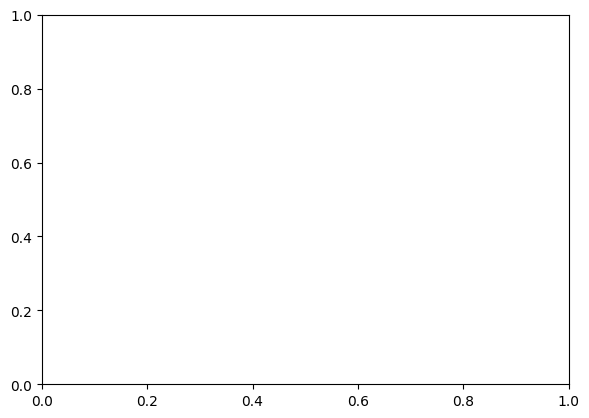

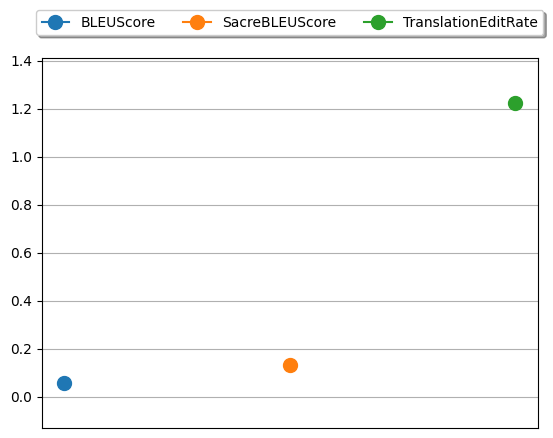

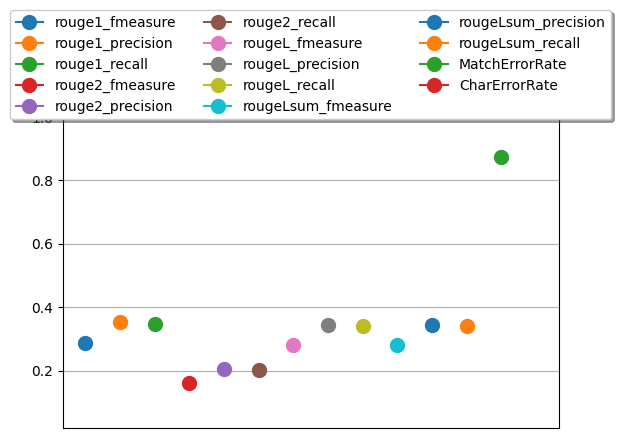

In [ ]:
t_m_a, t_m_b = compute_metrics(train_preds)

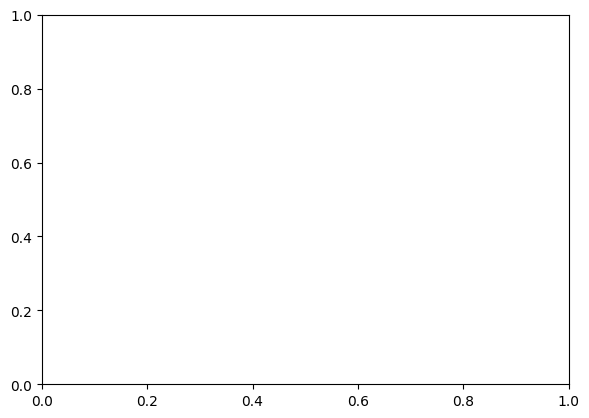

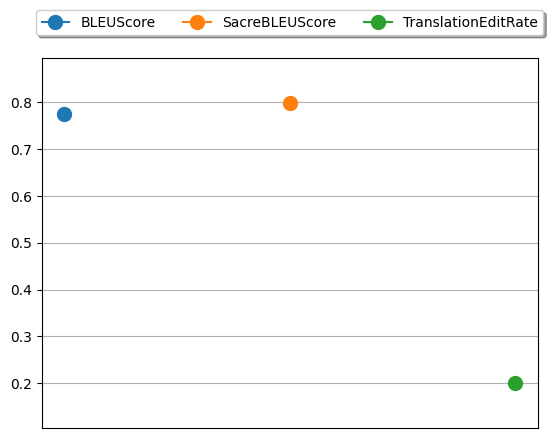

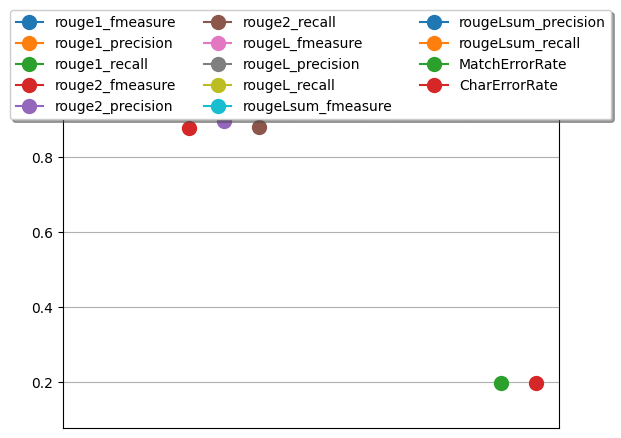

In [ ]:
v_m_a, v_m_b = compute_metrics(eval_preds)

In [ ]:
print(v_m_a)
print(v_m_b)

{'BLEUScore': tensor(0.7758), 'SacreBLEUScore': tensor(0.7985), 'TranslationEditRate': tensor(0.1998)}
{'rouge1_fmeasure': tensor(0.9267), 'rouge1_precision': tensor(0.9443), 'rouge1_recall': tensor(0.9273), 'rouge2_fmeasure': tensor(0.8791), 'rouge2_precision': tensor(0.8964), 'rouge2_recall': tensor(0.8795), 'rougeL_fmeasure': tensor(0.9216), 'rougeL_precision': tensor(0.9389), 'rougeL_recall': tensor(0.9220), 'rougeLsum_fmeasure': tensor(0.9214), 'rougeLsum_precision': tensor(0.9387), 'rougeLsum_recall': tensor(0.9218), 'MatchErrorRate': tensor(0.1977), 'CharErrorRate': tensor(0.1977)}
